### NYC Urban Noise Governance: A Spatio-Temporal and Machine-Learning Analysis  
### *Research Report — Trisha Wu*
### *November 2025*

---

## Abstract

Noise complaints are one of the largest and most persistent categories in New York City’s 311 system, reflecting both urban livability and the government’s operational capacity.
Using 814,100 noise complaints filed between November 23, 2024 and November 23, 2025, this study conducts a comprehensive spatio-temporal, behavioral, and machine-learning analysis of urban noise governance.

We first analyze the structure of citywide noise patterns, identifying systematic temporal cycles, borough differences, and complaint-type disparities across neighborhoods.
Next, we evaluate government response performance using response time, closure rate, and agency-level heterogeneity, finding large operational variations across agencies and locations.
Finally, we build predictive models—including Logistic Regression and Random Forest—to estimate whether a complaint will be closed within 24 hours.
Our best-performing model reaches high predictive accuracy (ROC-AUC = 0.978, PR-AUC = 0.9985), demonstrating that short-term closure is highly predictable from complaint metadata such as borough, time of day, noise type, and responsible agency.

Equity and fairness analysis reveals significant spatial disparities:
boroughs such as Manhattan and Brooklyn exhibit systematically higher closure rates, while Bronx and Staten Island show slower responses. Missing location information is strongly associated with delayed closure (24h closure rate drops from 98.66% to 32%), suggesting important data-quality inequalities affecting service delivery.

Together, this study combines urban analytics with machine learning to provide a policy-relevant framework for evaluating municipal response efficiency, identifying operational bottlenecks, and highlighting spatial and institutional disparities in NYC’s noise governance..

---

## 1. Introduction

Urban noise is one of the most persistent challenges in large metropolitan environments.
In New York City, noise consistently ranks among the top concerns reported through the 311 service request system, reflecting issues related to livability, street-level activity, nightlife, housing density, and construction patterns. Beyond its impact on quality of life, noise complaints also provide a valuable window into how effectively government agencies respond to citizen requests.

Despite the availability of open 311 data, comprehensive analyses of urban noise patterns and government responsiveness remain limited. Many studies focus solely on descriptive statistics, while others only examine single neighborhoods or short time periods.
This project takes a broader and more systematic approach by analyzing 814,100 noise complaints filed between November 23, 2024 and November 23, 2025, across all five boroughs.

This study addresses three central research questions:

Urban Noise Dynamics
What temporal, spatial, and behavioral patterns characterize NYC’s noise complaints?
For example: Do certain neighborhoods experience chronic night-time noise? Are weekends noisier than weekdays?

Government Operational Efficiency
How quickly do different agencies respond to noise complaints?
Are certain complaint types consistently resolved more slowly?

Predictive Modeling
Can we predict whether a complaint will be closed within 24 hours based solely on the complaint’s metadata (borough, time, type, etc.)?
What features matter most in explaining fast vs. delayed responses?

Equity & Spatial Fairness
Are response times equitable across boroughs and agencies?
Do poorer or peripheral boroughs receive slower service?

To answer these questions, this study builds an integrated analytical framework consisting of:

Block 1 – Urban Noise Patterns:
Temporal cycles, borough differences, and the structure of noise types.

Block 2 – Government Response Efficiency:
Agency-level variations, hourly performance, and closure-rate disparities.

Block 3 – Predictive Modeling:
Machine learning models (Logistic Regression, Random Forest) to predict 24-hour closure outcomes.

Block 4 – Equity & Fairness Analysis:
Spatial disparities between boroughs, agencies, and complaint categories.

This multi-stage framework combines urban analytics, statistical modeling, and machine learning, providing both descriptive insights and actionable predictive tools.
The results not only improve our understanding of noise dynamics but also offer policy-relevant evidence to support NYC’s efforts in improving service delivery and achieving more equitable governance.

---

# 2. Data Description

## 2.1 Data Source

This study uses data from the **NYC 311 Service Requests** dataset, publicly available on NYC Open Data.  
To ensure temporal consistency and focus on contemporary noise governance, the analysis includes only noise-related complaints filed between:

$$
\text{November 23, 2024 — November 23, 2025}
$$

Noise complaints are selected using:

$$
\text{Complaint Type contains "Noise"}
$$

After filtering, the dataset contains:

- **814,100 noise complaints**
- Across all five boroughs
- Logged by multiple agencies (NYPD, DEP, DOT, DOB, etc.)
- Includes both open and closed complaints

---

## 2.2 Key Variables

### **(a) Timestamps**
- **Created Date** — when the complaint was filed  
- **Closed Date** — when the complaint was resolved  
- **Response Time (hours)** computed as:

$$
\text{response\_hours}
=
\frac{\text{Closed Date} - \text{Created Date}}{3600}
$$

---

### **(b) Temporal Features**

| Feature | Description |
|--------|-------------|
| hour | Hour of day (0–23) |
| dayofweek | Day of week (0 = Monday) |
| month | Month of year (1–12) |
| is\_weekend | 1 if Saturday/Sunday |

---

### **(c) Spatial & Agency Variables**

| Feature | Description |
|--------|-------------|
| Borough | Manhattan, Bronx, Brooklyn, Queens, Staten Island |
| Agency | e.g., NYPD, DEP, DOB, DOT |
| Location Type | building, street, park, etc. |

---

### **(d) Complaint Characteristics**

- **Complaint Type** — high-level categories (Noise–Residential, Noise–Vehicle, etc.)  
- **Descriptor** — detailed subtype (loud music, construction, barking dog…)

---

## 2.3 Data Cleaning & Filtering

Cleaning steps before modeling:

1. Converted timestamps to datetime  
2. Removed rows with invalid or missing Created Date  
3. Computed response hours  
4. Filtered out unreasonable values:
   - Negative response times  
   - Response times > 7 days (168 hours)  
5. Created the target variable:

$$
\text{closed\_24h} =
\begin{cases}
1, & \text{if } \text{response\_hours} \le 24 \\
0, & \text{otherwise}
\end{cases}
$$


**Example cleaned rows:**

| response\_hours | closed\_24h |
|----------------|-------------|
| 0.0617 | 1 |
| 0.2833 | 1 |
| 0.1453 | 1 |
| 0.0128 | 1 |
| 0.3253 | 1 |

---

## 2.4 Dataset Summary

- **Total noise complaints analyzed:** 814,100  
- **Valid modeling sample:** 814,100
- **Median response time:** ~1.18 hours  
- **24-hour closure rate:** ~94.87%  

These processed features form the analytical basis for all subsequent blocks.

---

## 3. Urban Noise Patterns (Block 1)
3.1 Monthly Noise Complaint Trends
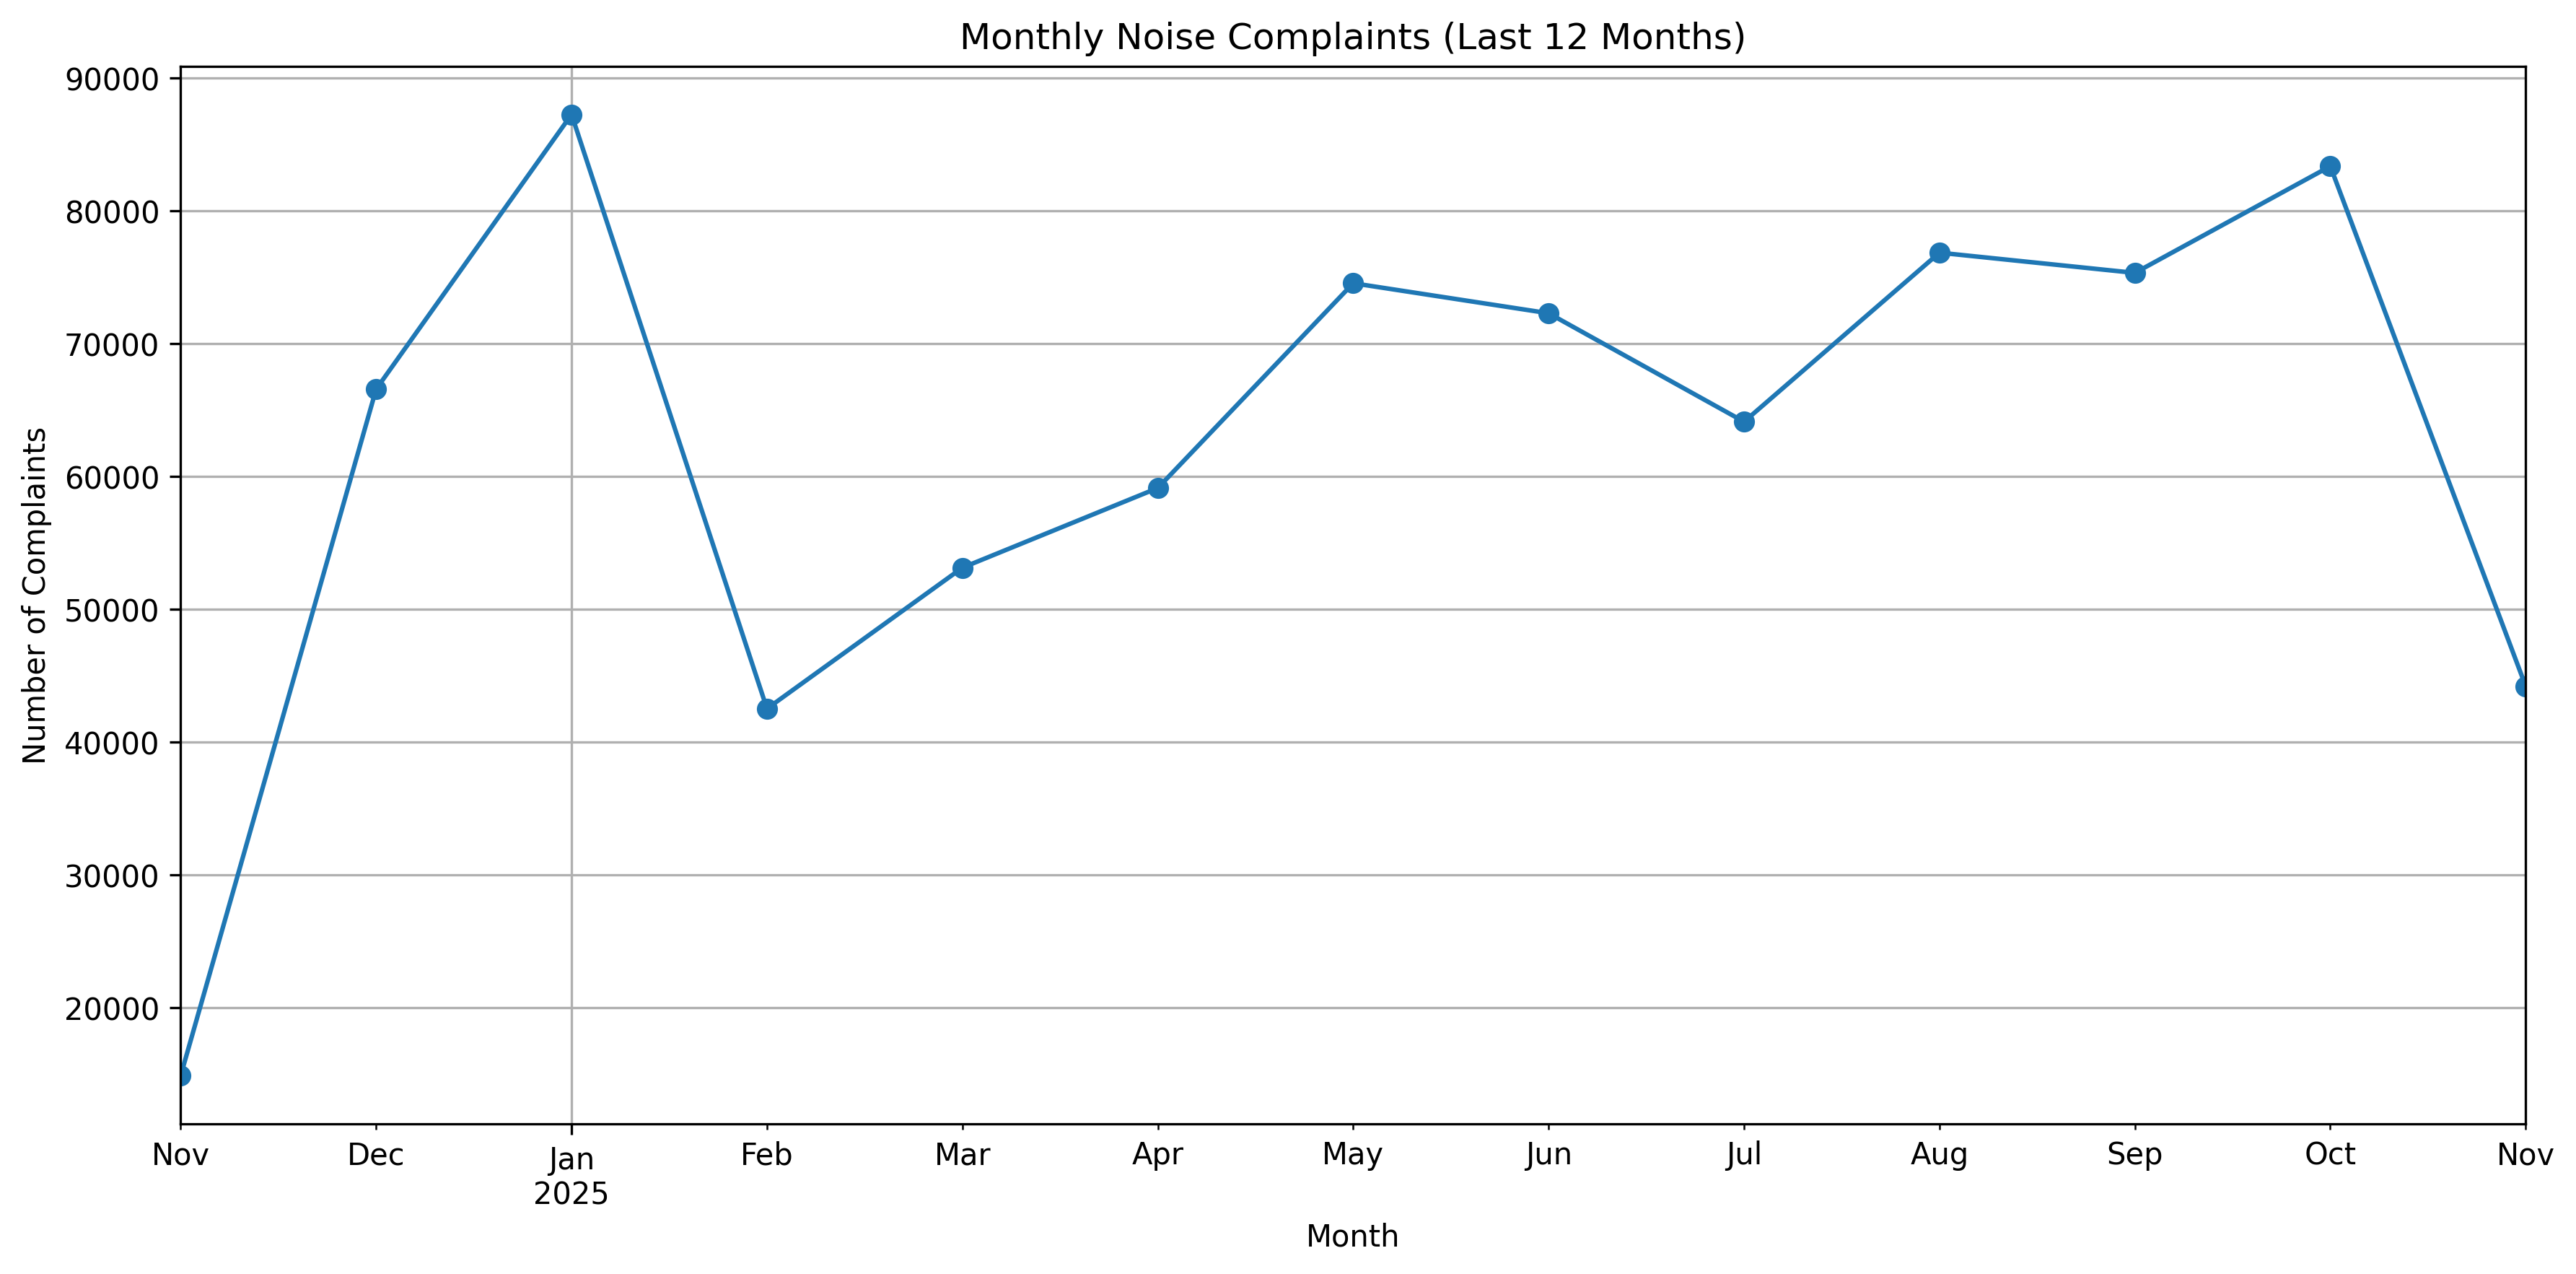
Figure 1 shows the monthly volume of noise complaints over the past 12 months. The data reveal a clear seasonal pattern. Complaints rise sharply from November into winter, reaching a peak in January, which records the highest monthly volume. After a drop in February, complaints gradually increase through spring and remain relatively elevated throughout the summer and early fall. A second local high appears in October, followed by a sharp decline in November.

Overall, the pattern suggests that noise complaints are not evenly distributed across the year, with winter peaks likely reflecting indoor activity and holiday-related gatherings, while summer and early fall maintain consistently high levels associated with outdoor social activity and longer evening hours.



3.2 Borough-Level Distribution of Noise Complaints
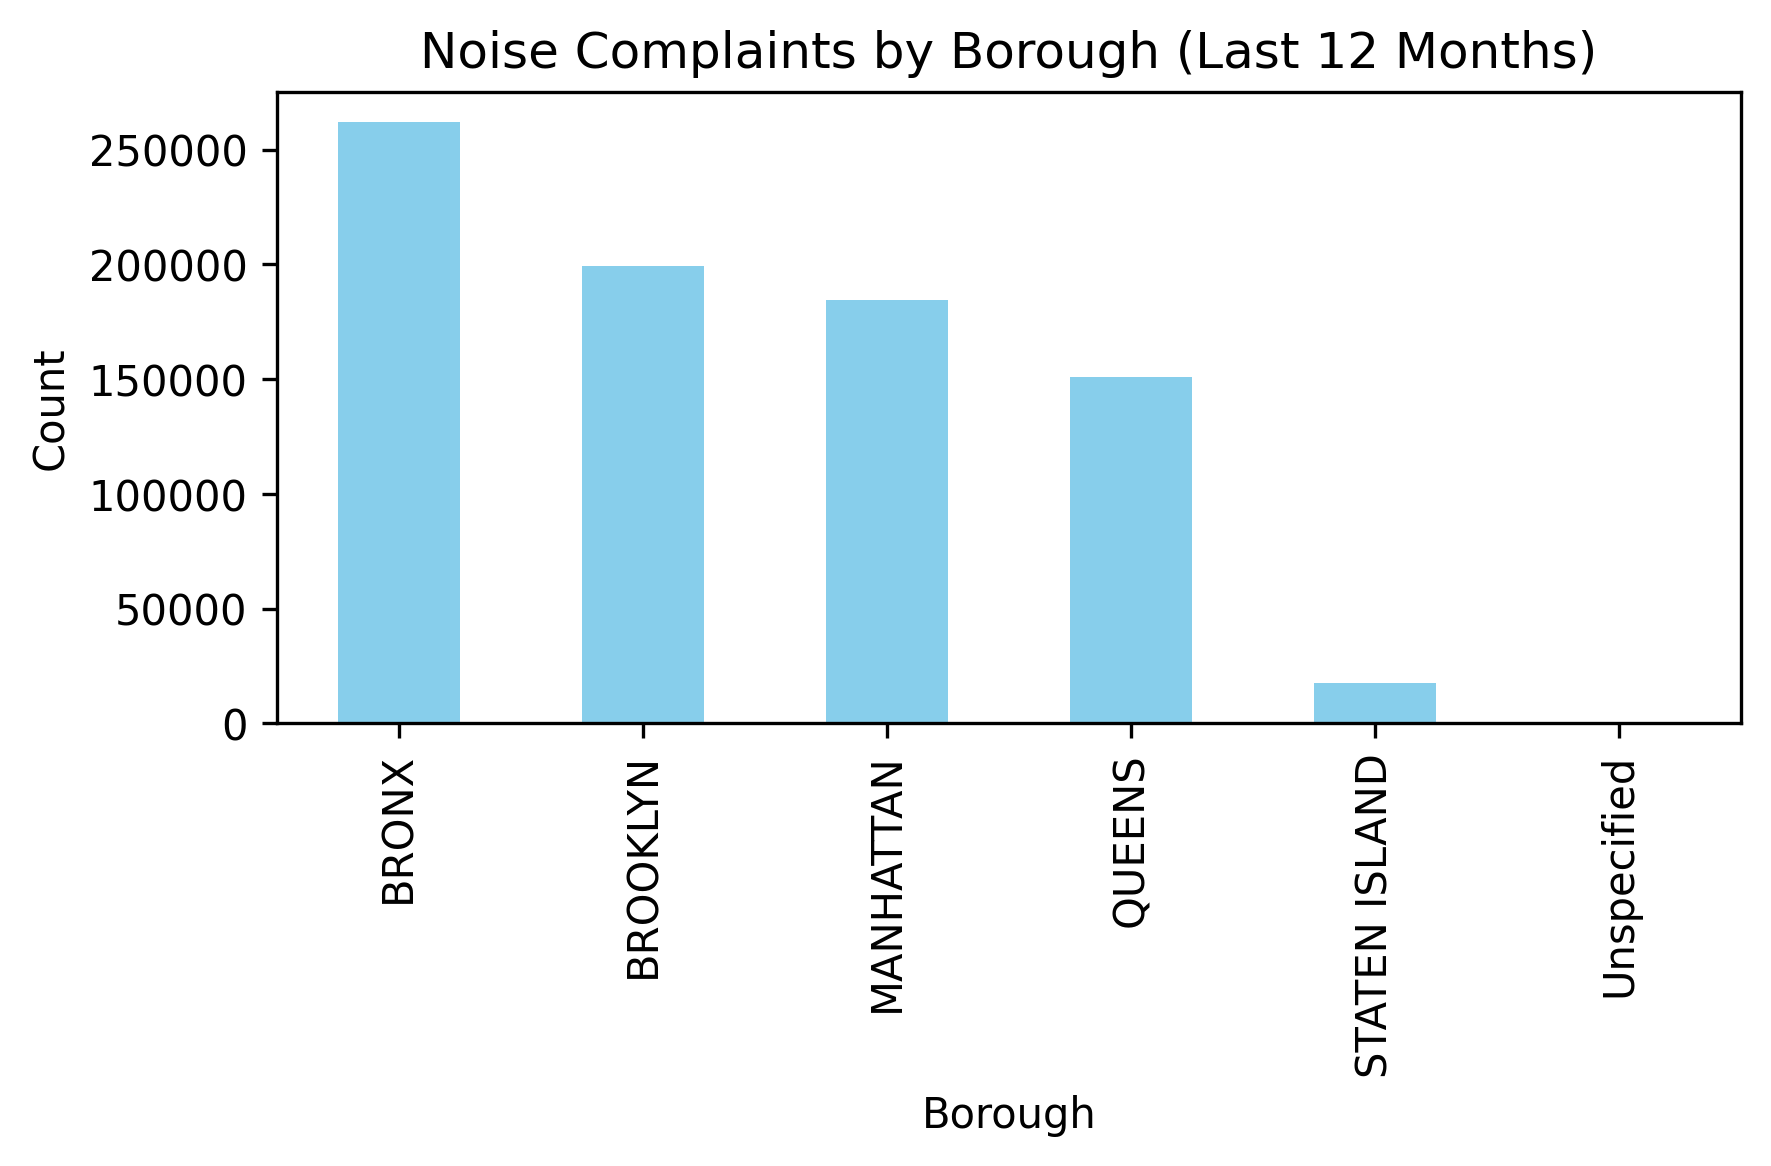
Figure 2 shows the distribution of noise complaints across New York City boroughs over the past year. Complaints are highly uneven spatially. The Bronx records the largest volume, followed by Brooklyn, Manhattan, and Queens, which form a second tier with moderately similar levels. Staten Island reports significantly fewer complaints, reflecting its lower population density and more residential character. A small number of cases fall under “Unspecified.”

Overall, these differences indicate that noise issues are strongly shaped by borough-level population density, built environment characteristics, and neighborhood activity patterns.

3.3 Temporal Patterns: Hour × Day-of-Week Heatmap

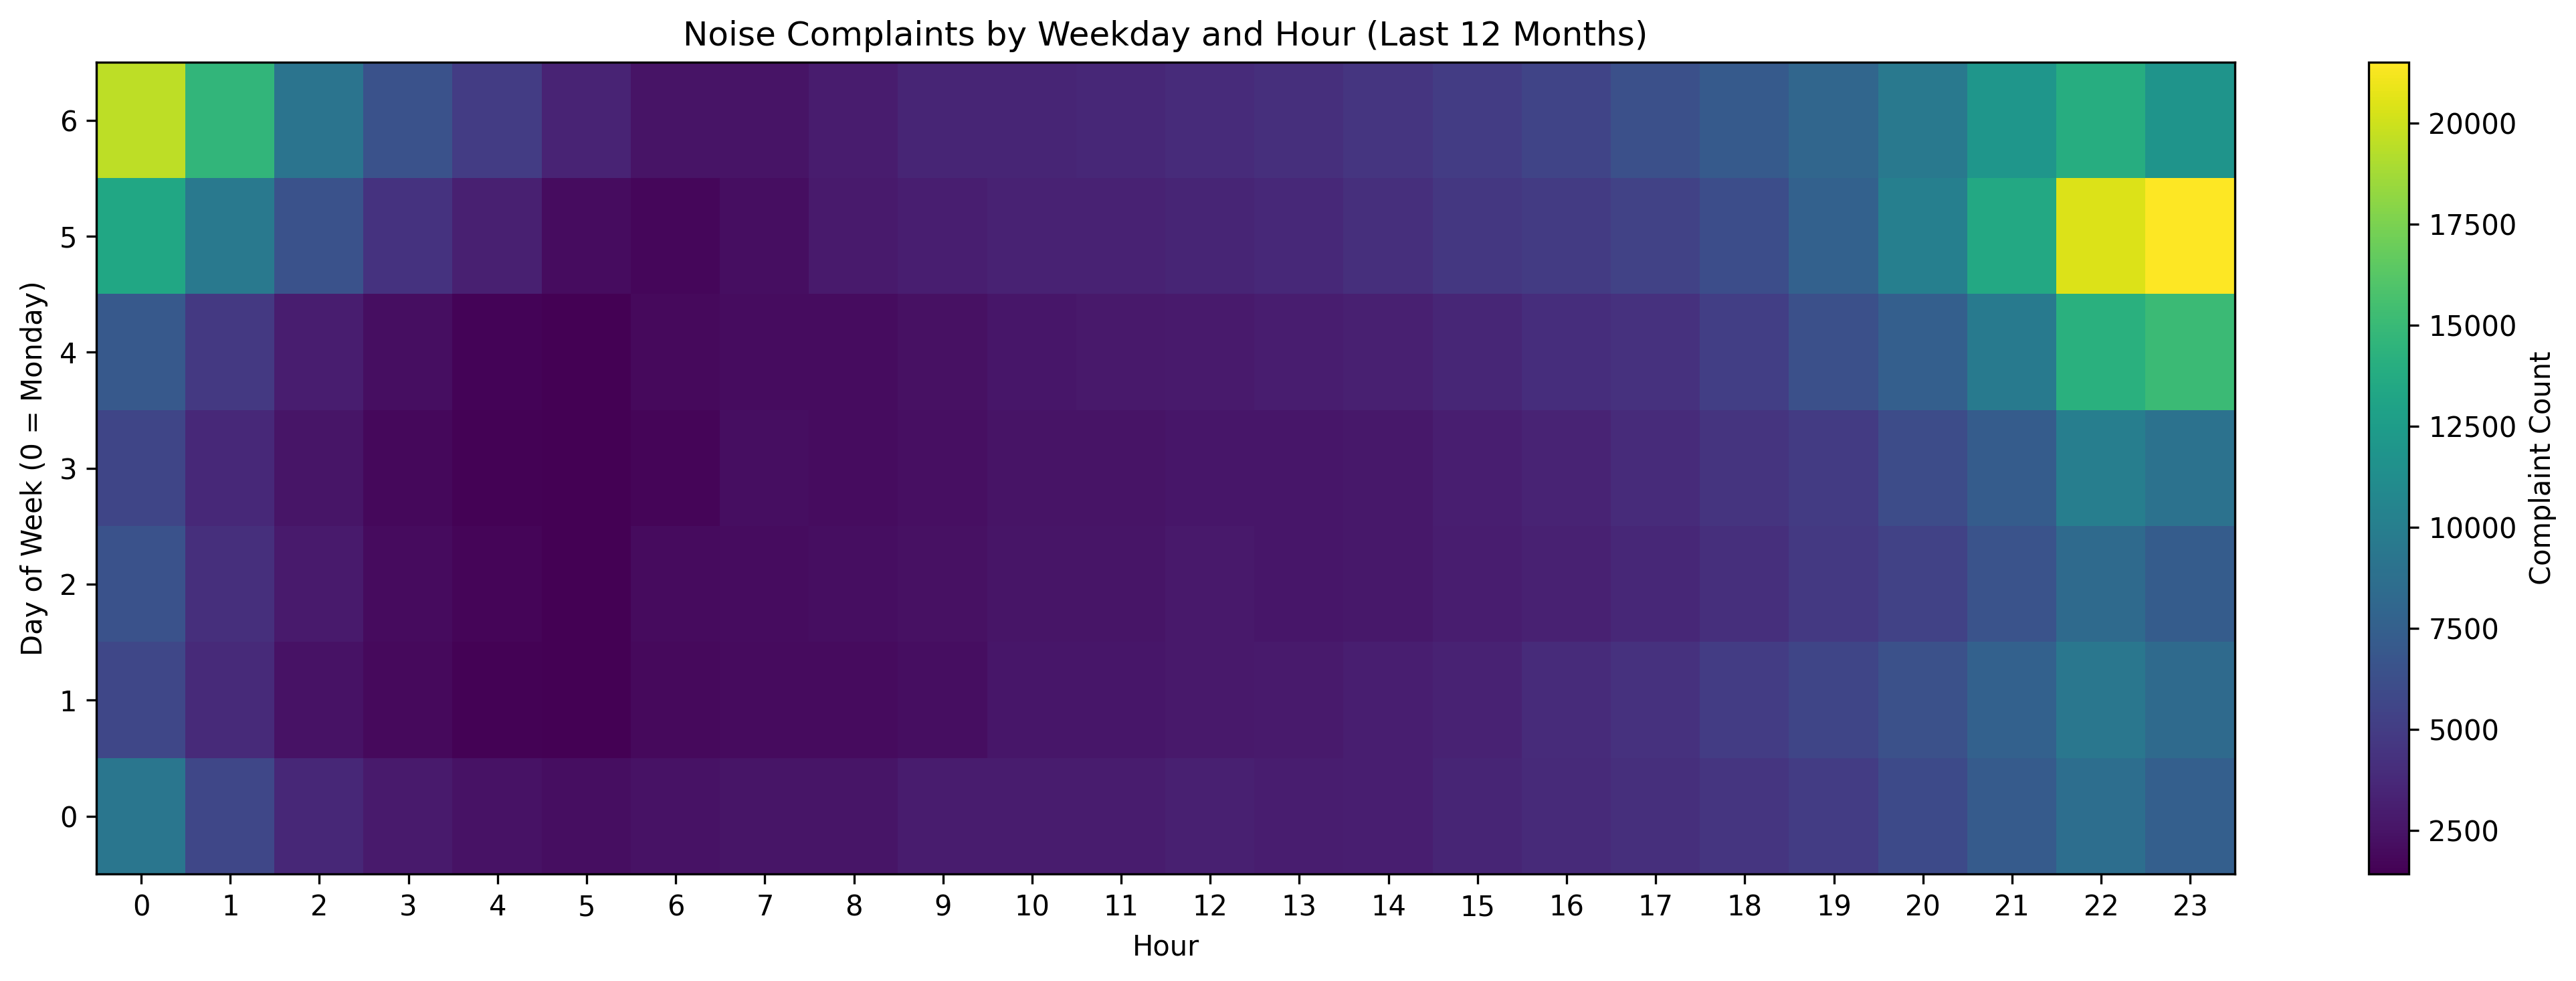


Figure 3 shows noise complaints across weekday (0 = Monday) and hour. Complaints are consistently low during early morning hours across all weekdays. Activity begins to rise in the late afternoon and reaches a clear peak between 21:00 and 23:00. The strongest intensity occurs on Friday and Saturday nights, indicating a pronounced weekend nightlife effect. Weekdays show a similar hourly curve but with lower evening volumes.

Overall, the heatmap highlights a stable daily rhythm—low early morning activity, gradual afternoon buildup, and a strong late-evening peak—amplified significantly on weekends.

3.4 Temporal Profiles of Major Noise Categories
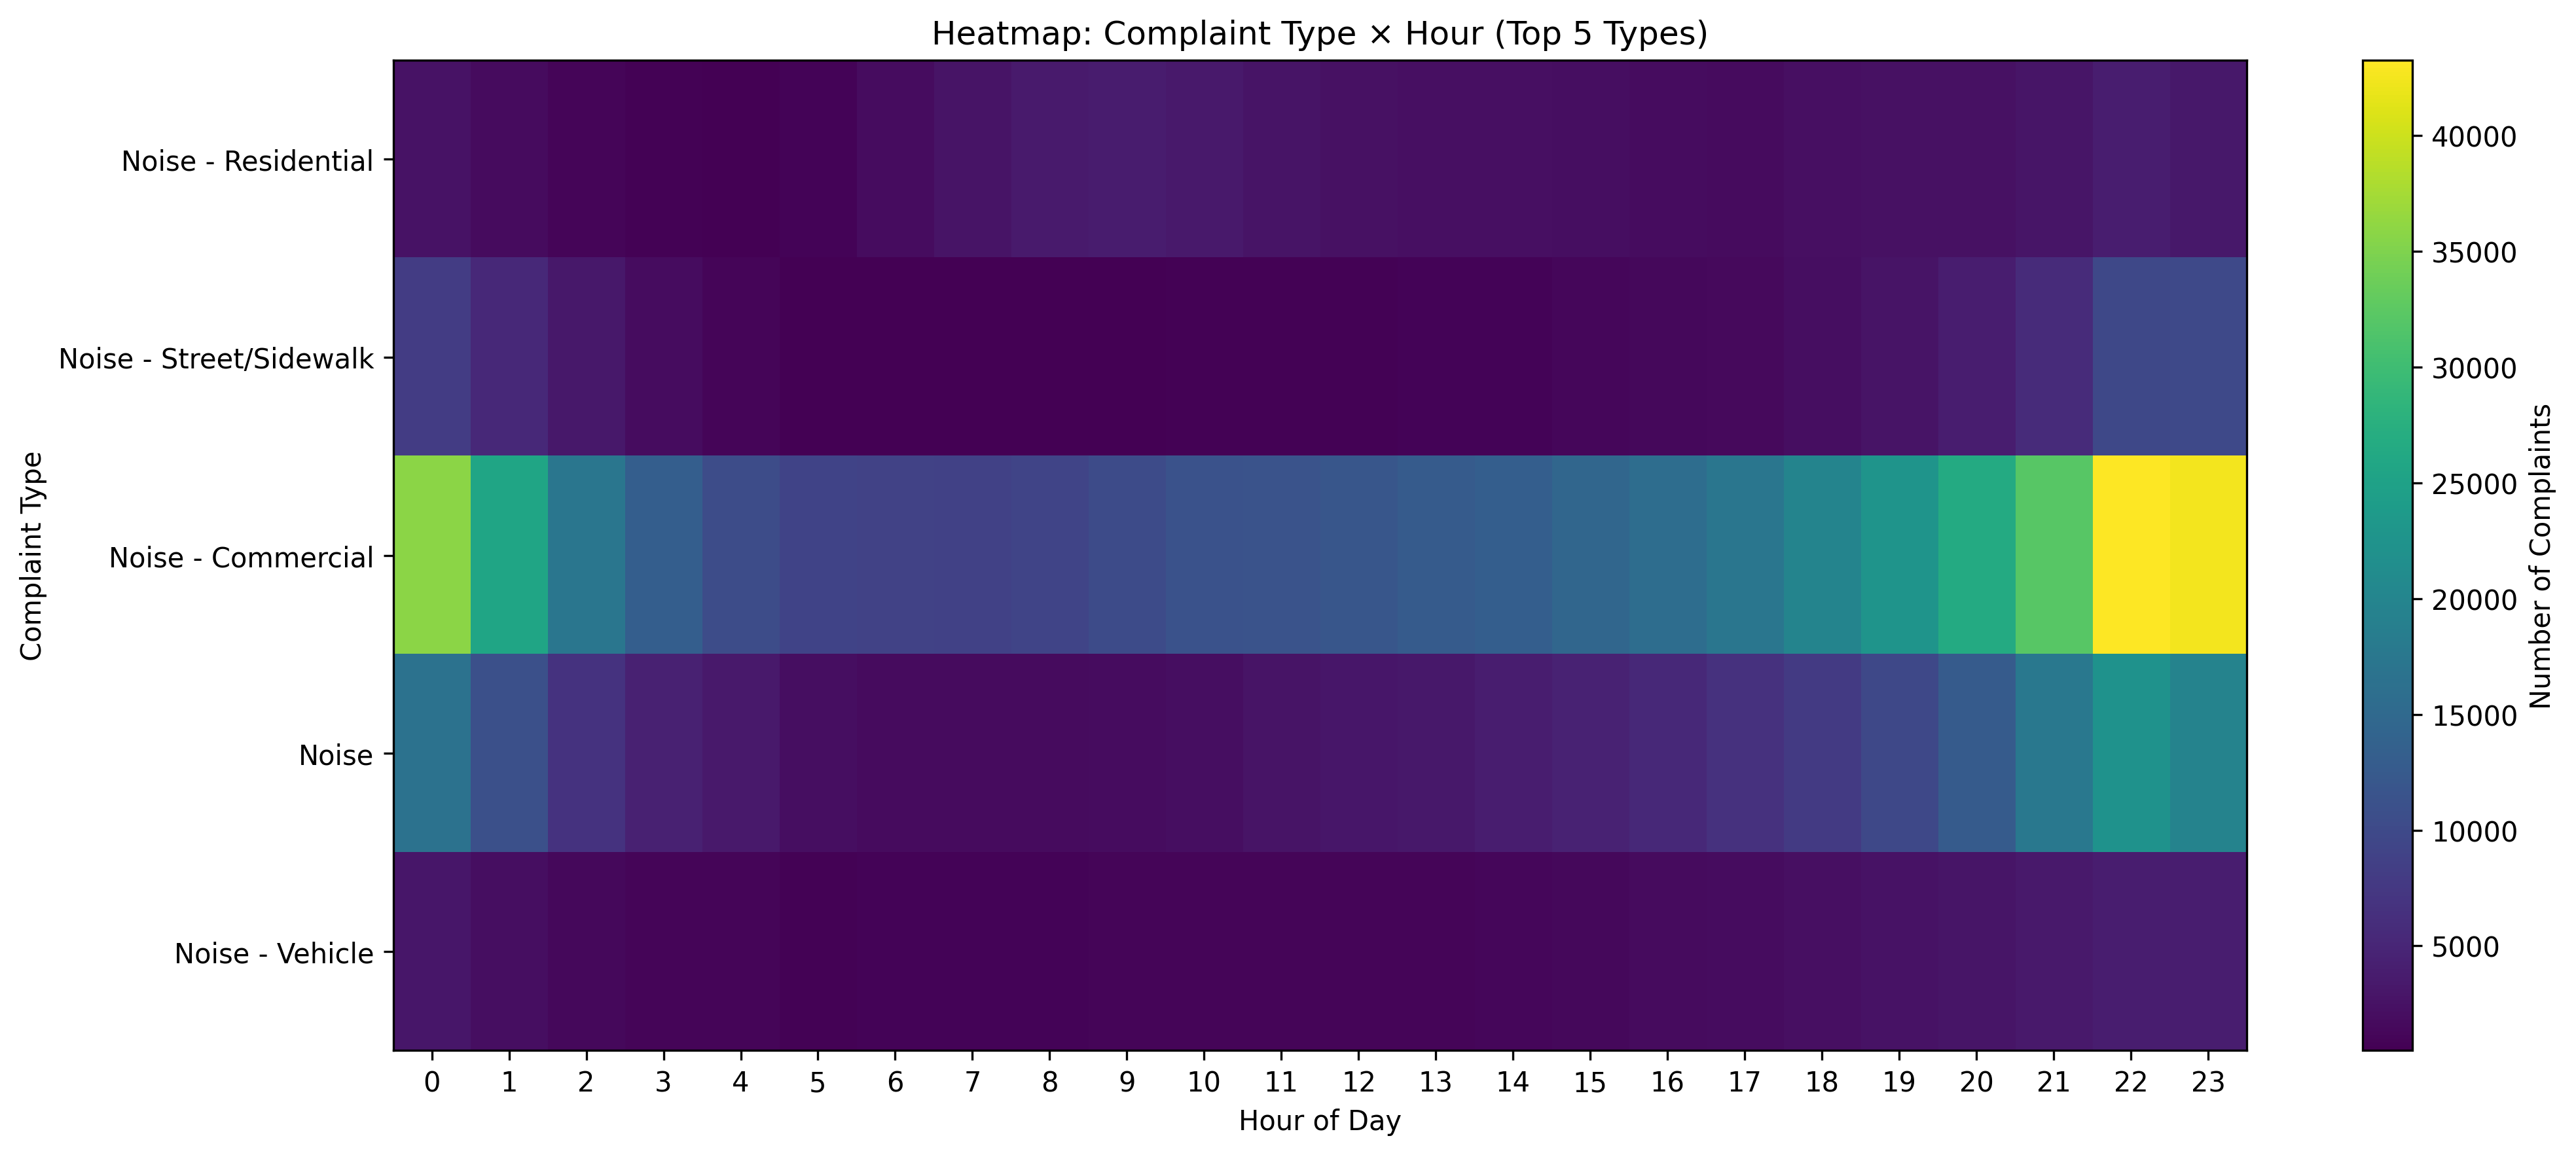

Figure 4 compares hourly complaint patterns across the five most common noise types. The categories show distinct temporal signatures. Noise – Commercial dominates and exhibits a strong evening peak between 19:00 and 23:00, with the single highest intensity at 23:00. Noise – Street/Sidewalk shows elevated activity after midnight (00:00–03:00), reflecting late-night pedestrian and nightlife spillover. The broad “Noise” category follows a milder evening rise, while Residential and Vehicle complaints remain low across all hours with only slight increases late at night.

These differences indicate that commercial and street-related disturbances drive most of the city’s late-evening and overnight noise patterns.



3.6 Summary of Urban Noise Patterns

Across monthly, spatial, weekly, and hourly analyses, NYC’s noise complaints show a clear and structured urban rhythm. Complaints concentrate in dense boroughs, particularly the Bronx and Brooklyn, and rise sharply during evening hours, peaking near 23:00. Weekends amplify these patterns, especially late at night. Noise types also exhibit distinct temporal signatures: commercial and street-related categories dominate the evening and overnight periods, while residential and vehicle complaints remain comparatively low and diffuse.

Overall, the evidence suggests that NYC’s noise environment is strongly shaped by nightlife activity, commercial density, and late-evening social behavior. These structured patterns provide essential context for interpreting agency workload, response performance, and potential inequities in later sections.




---

## 4. Government Response Efficiency (Block 2)
4.1 Defining Response Metrics

To evaluate institutional response efficiency, we construct several operational metrics derived from the raw timestamps of complaint creation and closure. These indicators provide a foundation for understanding how quickly the system reacts to noise reports and which cases are more likely to receive timely resolution.

Median and Distribution of Response Time

Across all valid complaints, the median response time is:

Median response time: 1.18 hours

Response times are highly right-skewed, as shown by the quartiles:

25th percentile: 0.50 hours

50th percentile: 1.18 hours

75th percentile: 3.39 hours

This distribution suggests that most complaints are addressed relatively quickly, with a long tail of slower cases.

24-Hour and 48-Hour Closure Rates

Time-to-closure is further summarized using binary indicators:

Closed within 24 hours: 94.87%

Closed within 48 hours: 97.22%

The extremely high 24h and 48h closure rates indicate that NYC’s noise-response system is generally fast and consistent, with only a small fraction of cases experiencing substantial delays.

These response metrics form the baseline for the subsequent institutional and temporal analyses in Sections 4.2 and 4.3.


4.2 Institutional Differences in Response Efficiency 

Clear disparities emerge across agencies responsible for handling noise complaints. Table 4.1 summarizes the two principal responders—NYPD and the Department of Environmental Protection (DEP)—and reveals a sharp institutional contrast.
         n_cases	closed_24h_rate  median_response_hours	mean_response_hours
Agency				
NYPD	735900	    0.98                  1.067	                2.865
DEP     44402	    0.320	              45.542	            59.287

Agency-Level Performance

NYPD handles the overwhelming majority of cases (735,900 complaints) and resolves 98.7% of them within 24 hours.

Median response time: 1.07 hours

Mean response time: 2.87 hours

DEP, by contrast, manages far fewer cases (44,402 complaints) and shows much slower resolution: only 32.0% are closed within 24 hours.

Median response time: 45.54 hours

Mean response time: 59.29 hours

These patterns illustrate a dual-track governance structure, where police-led responses (NYPD) operate rapidly, while environmental inspections (DEP) follow a slower, inspection-based workflow that cannot close cases immediately.

Variation Across Complaint Types

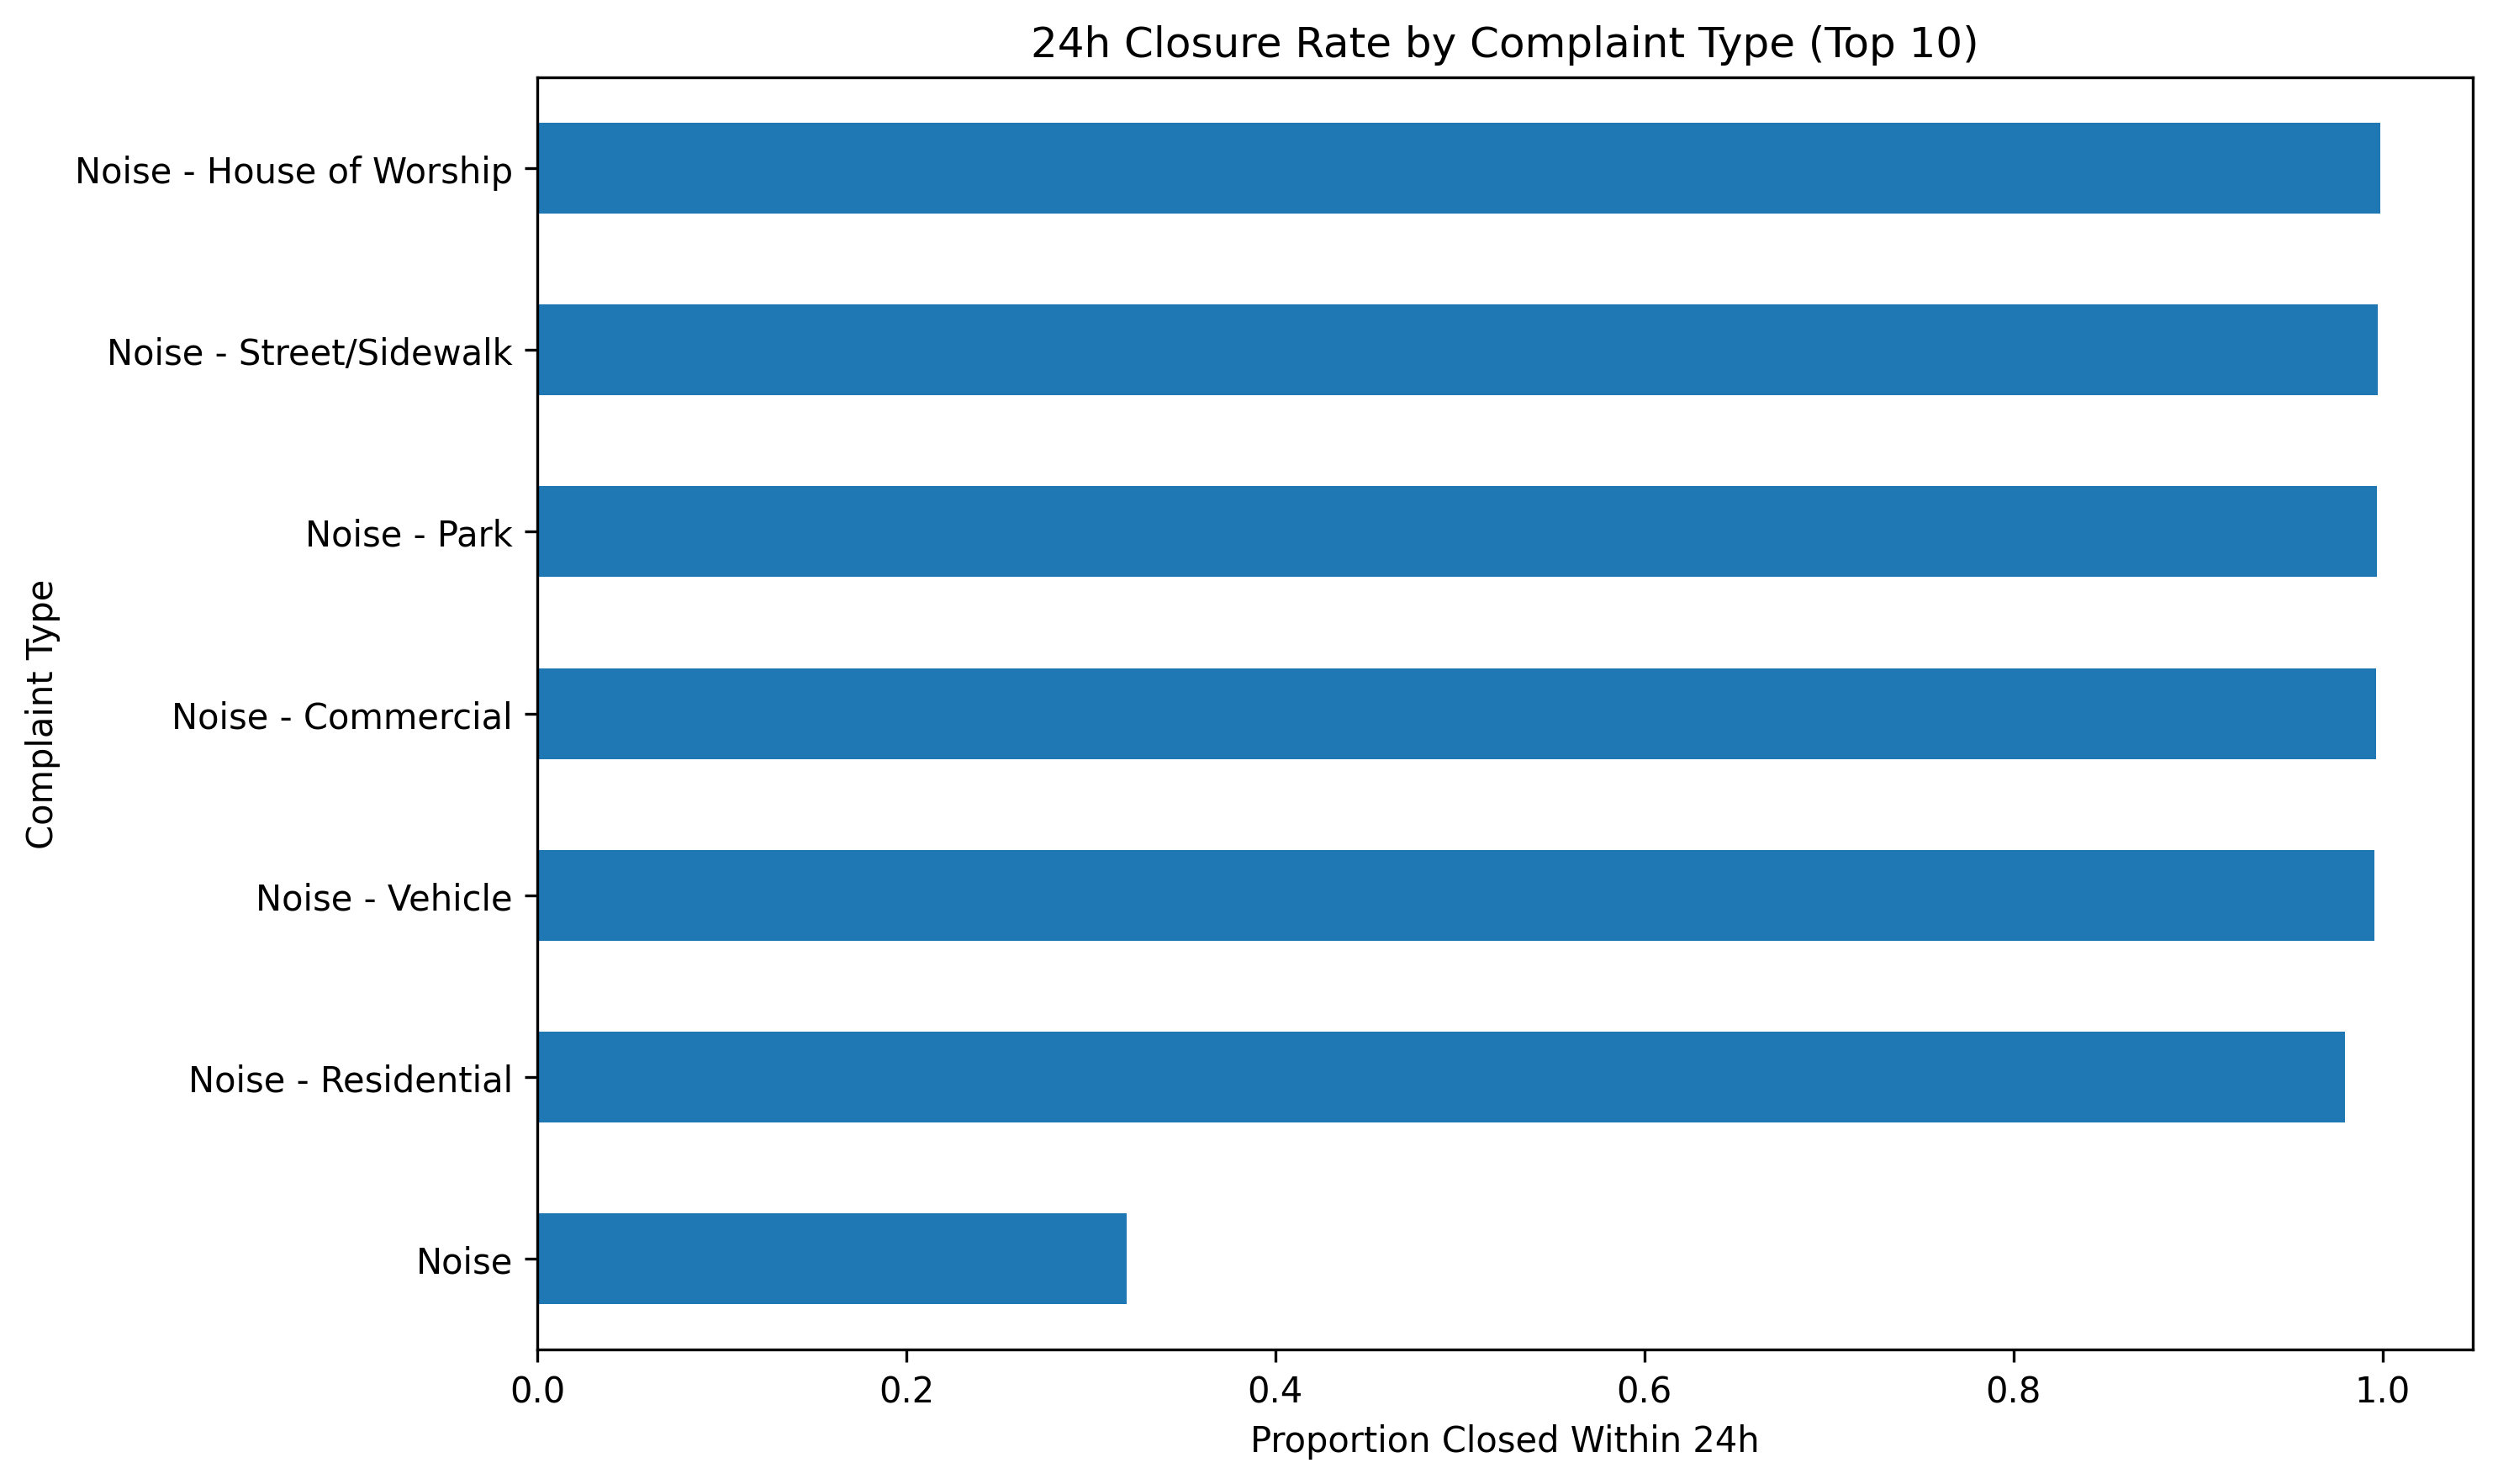
Figure 5 shows the 24-hour closure rates for the top 10 complaint categories. Almost all types—commercial, sidewalk, park, vehicle—are resolved at extremely high rates (≈99%). The only exception is the broad category "Noise", which records a markedly lower rate (~33%), suggesting that this catch-all category is disproportionately handled by DEP, not NYPD.

This reinforces the institutional divide: complaint type determines agency assignment, which in turn largely determines response speed.

4.3 Temporal Efficiency

To examine how response efficiency varies over time, we analyze closure rates across hours of the day, days of the week, and the interaction between agency and hour. These patterns illustrate the operational rhythm of New York City’s noise-response system.

Hourly Closure Rate Patterns

Across the 24-hour day, the probability of closing a complaint within 24 hours exhibits a clear diurnal cycle.
According to the hourly aggregation:

Early morning (00:00–04:00) maintains the highest closure rates, consistently around 0.97–0.98.

A sharp decline occurs around 06:00–09:00, reaching a minimum of ~0.87.

Efficiency gradually recovers after midday and rises back above 0.96 in the evening hours.

This suggests that the early-morning period benefits from lighter call volume, while the morning operational rush produces temporary inefficiencies.

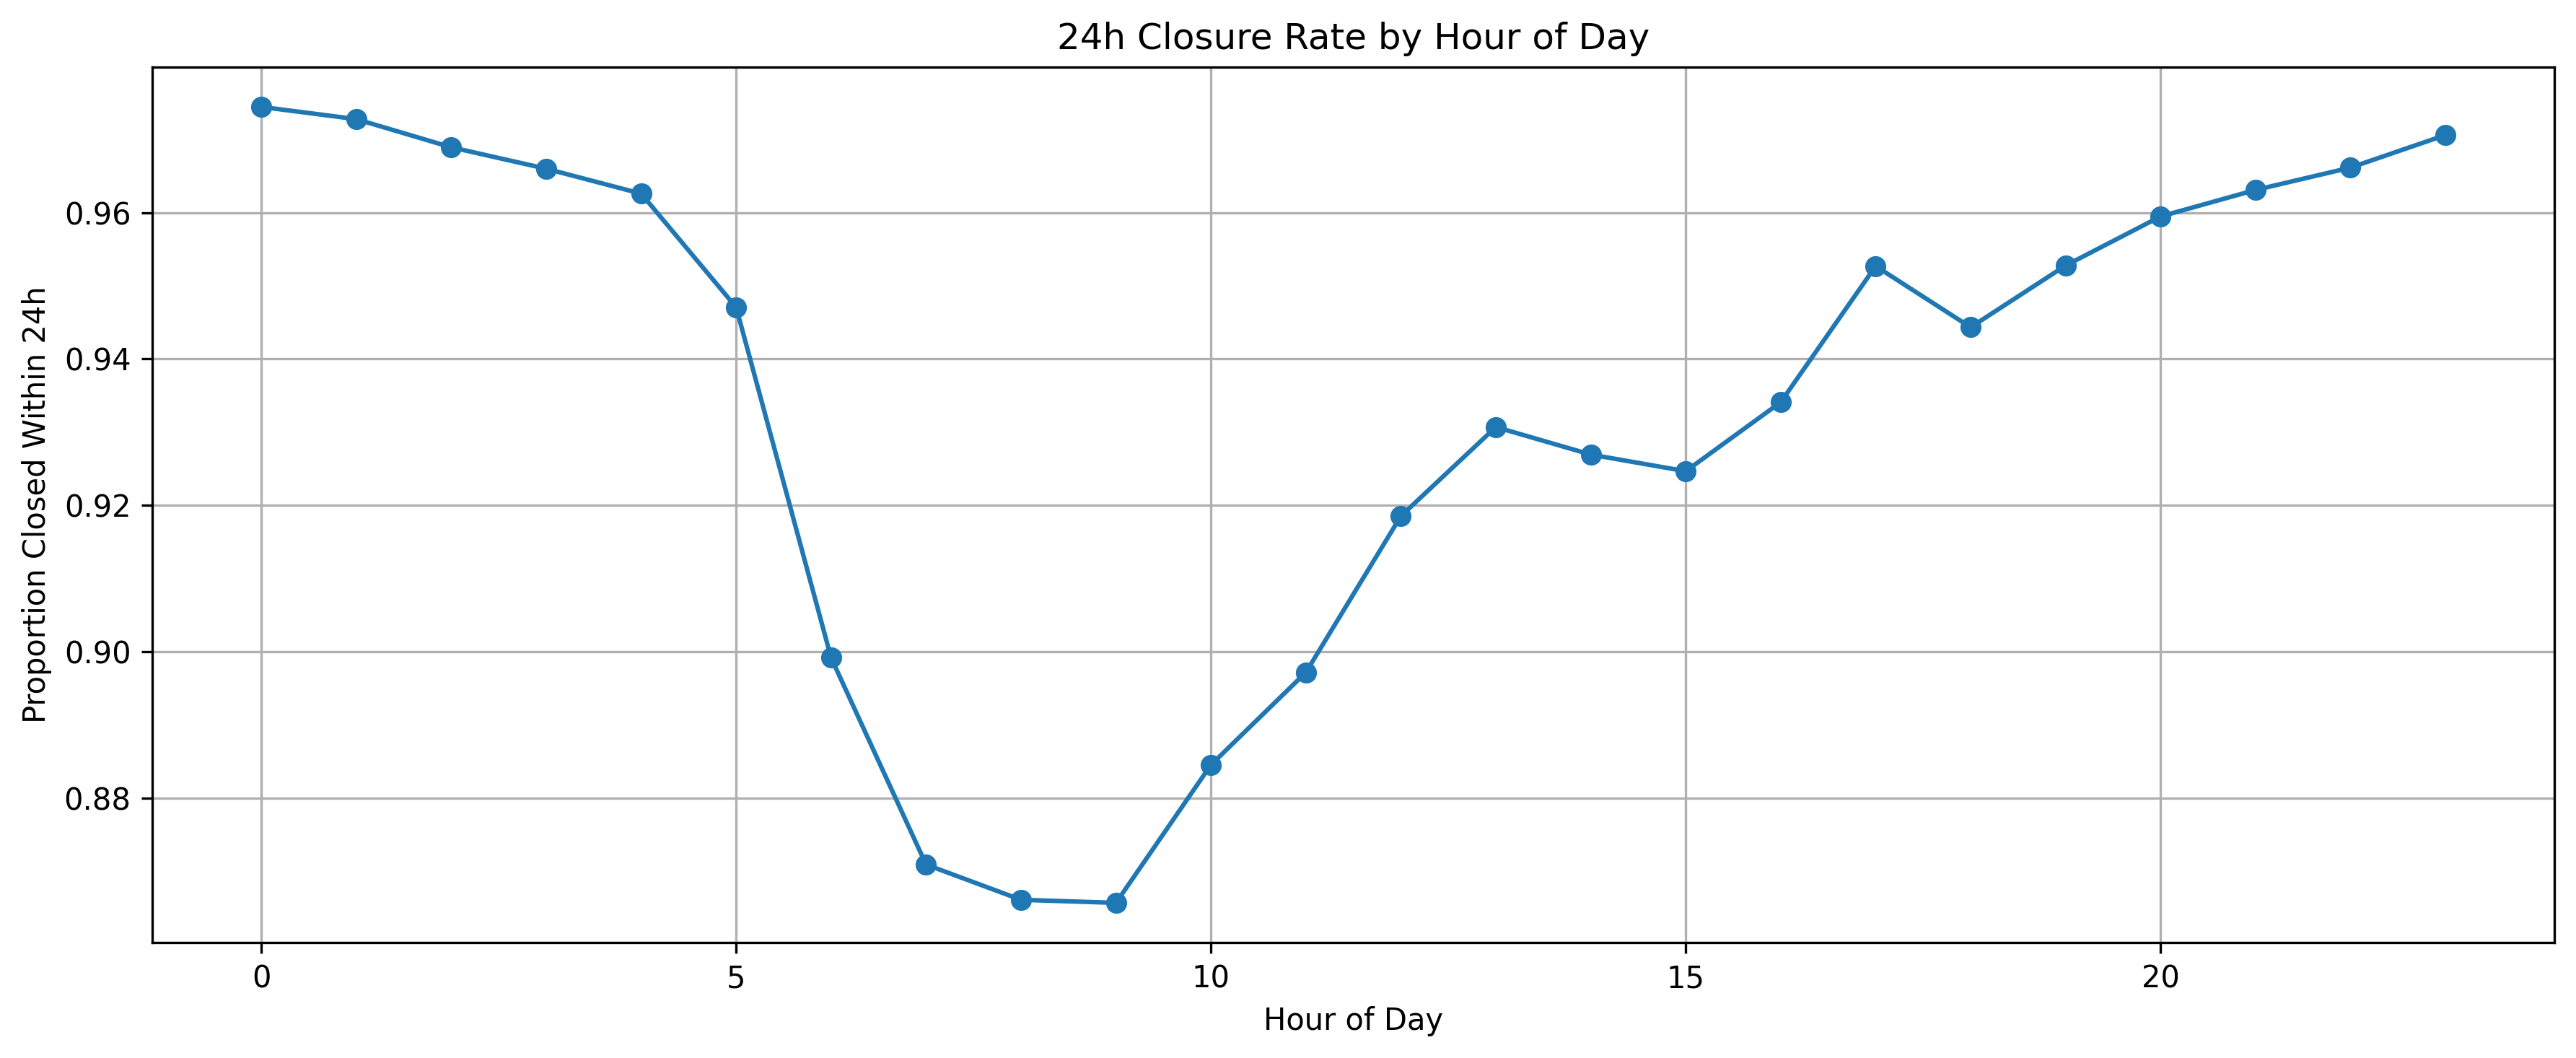
Figure — 24h Closure Rate by Hour of Day

Day-of-Week Differences

Weekly patterns also show systematic variation:

Monday starts relatively strong (~0.949).

Tuesday and Wednesday show the lowest closure rates (0.91–0.92).

Thursday to Sunday show an upward trend.

Sunday reaches the weekly peak at 0.978.

The mid-week dip may reflect accumulated backlog or operational load, while weekend improvements likely correspond to lower ticket volume or more predictable complaint types.

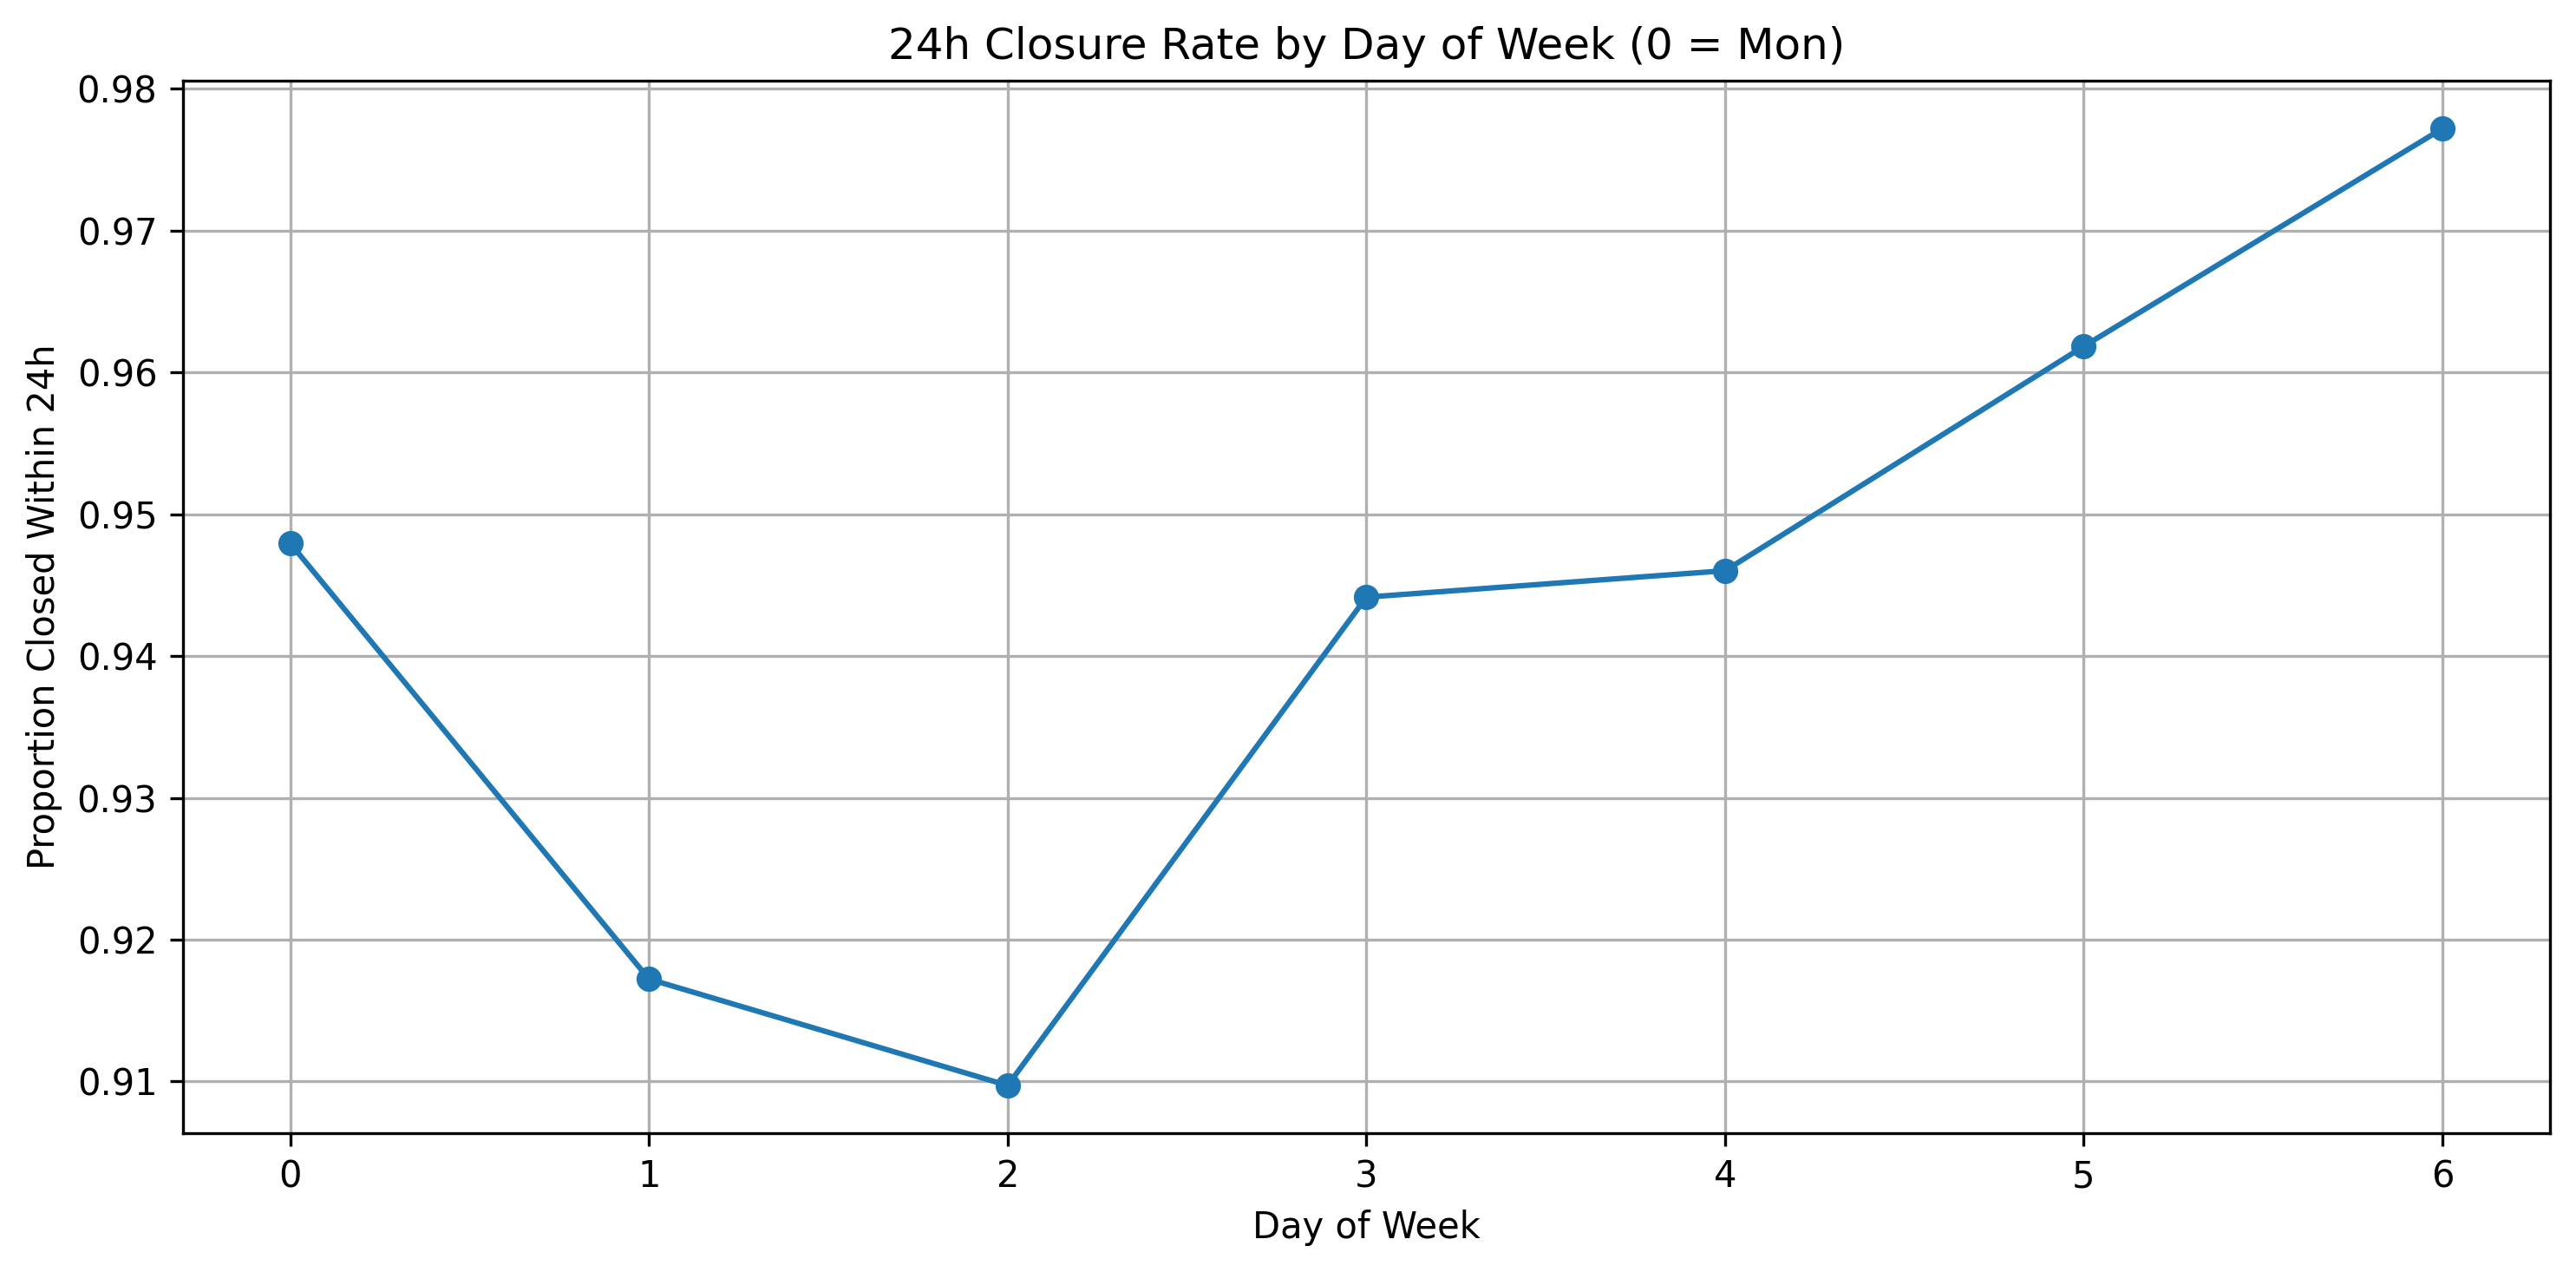
Figure — 24h Closure Rate by Day of Week

Agency × Hour Interaction

A time-of-day comparison between NYPD and DEP reveals substantial institutional differences in temporal efficiency.

NYPD

Closure rates remain extremely stable across all hours:
0.973–0.993.

No visible morning dip.

Reflects a highly standardized, round-the-clock workflow.

DEP

Efficiency is much lower overall and highly volatile.

Peaks around 00:00–05:00 at 0.40–0.46.

Drops to its lowest levels between 06:00–09:00 (as low as 0.214).

Gradually improves through the afternoon, rising above 0.42 by late evening.

These contrasting profiles suggest two operational models:

NYPD: high-capacity, continuous service model.

DEP: constrained, daytime-heavy operations with limited early-morning capacity.

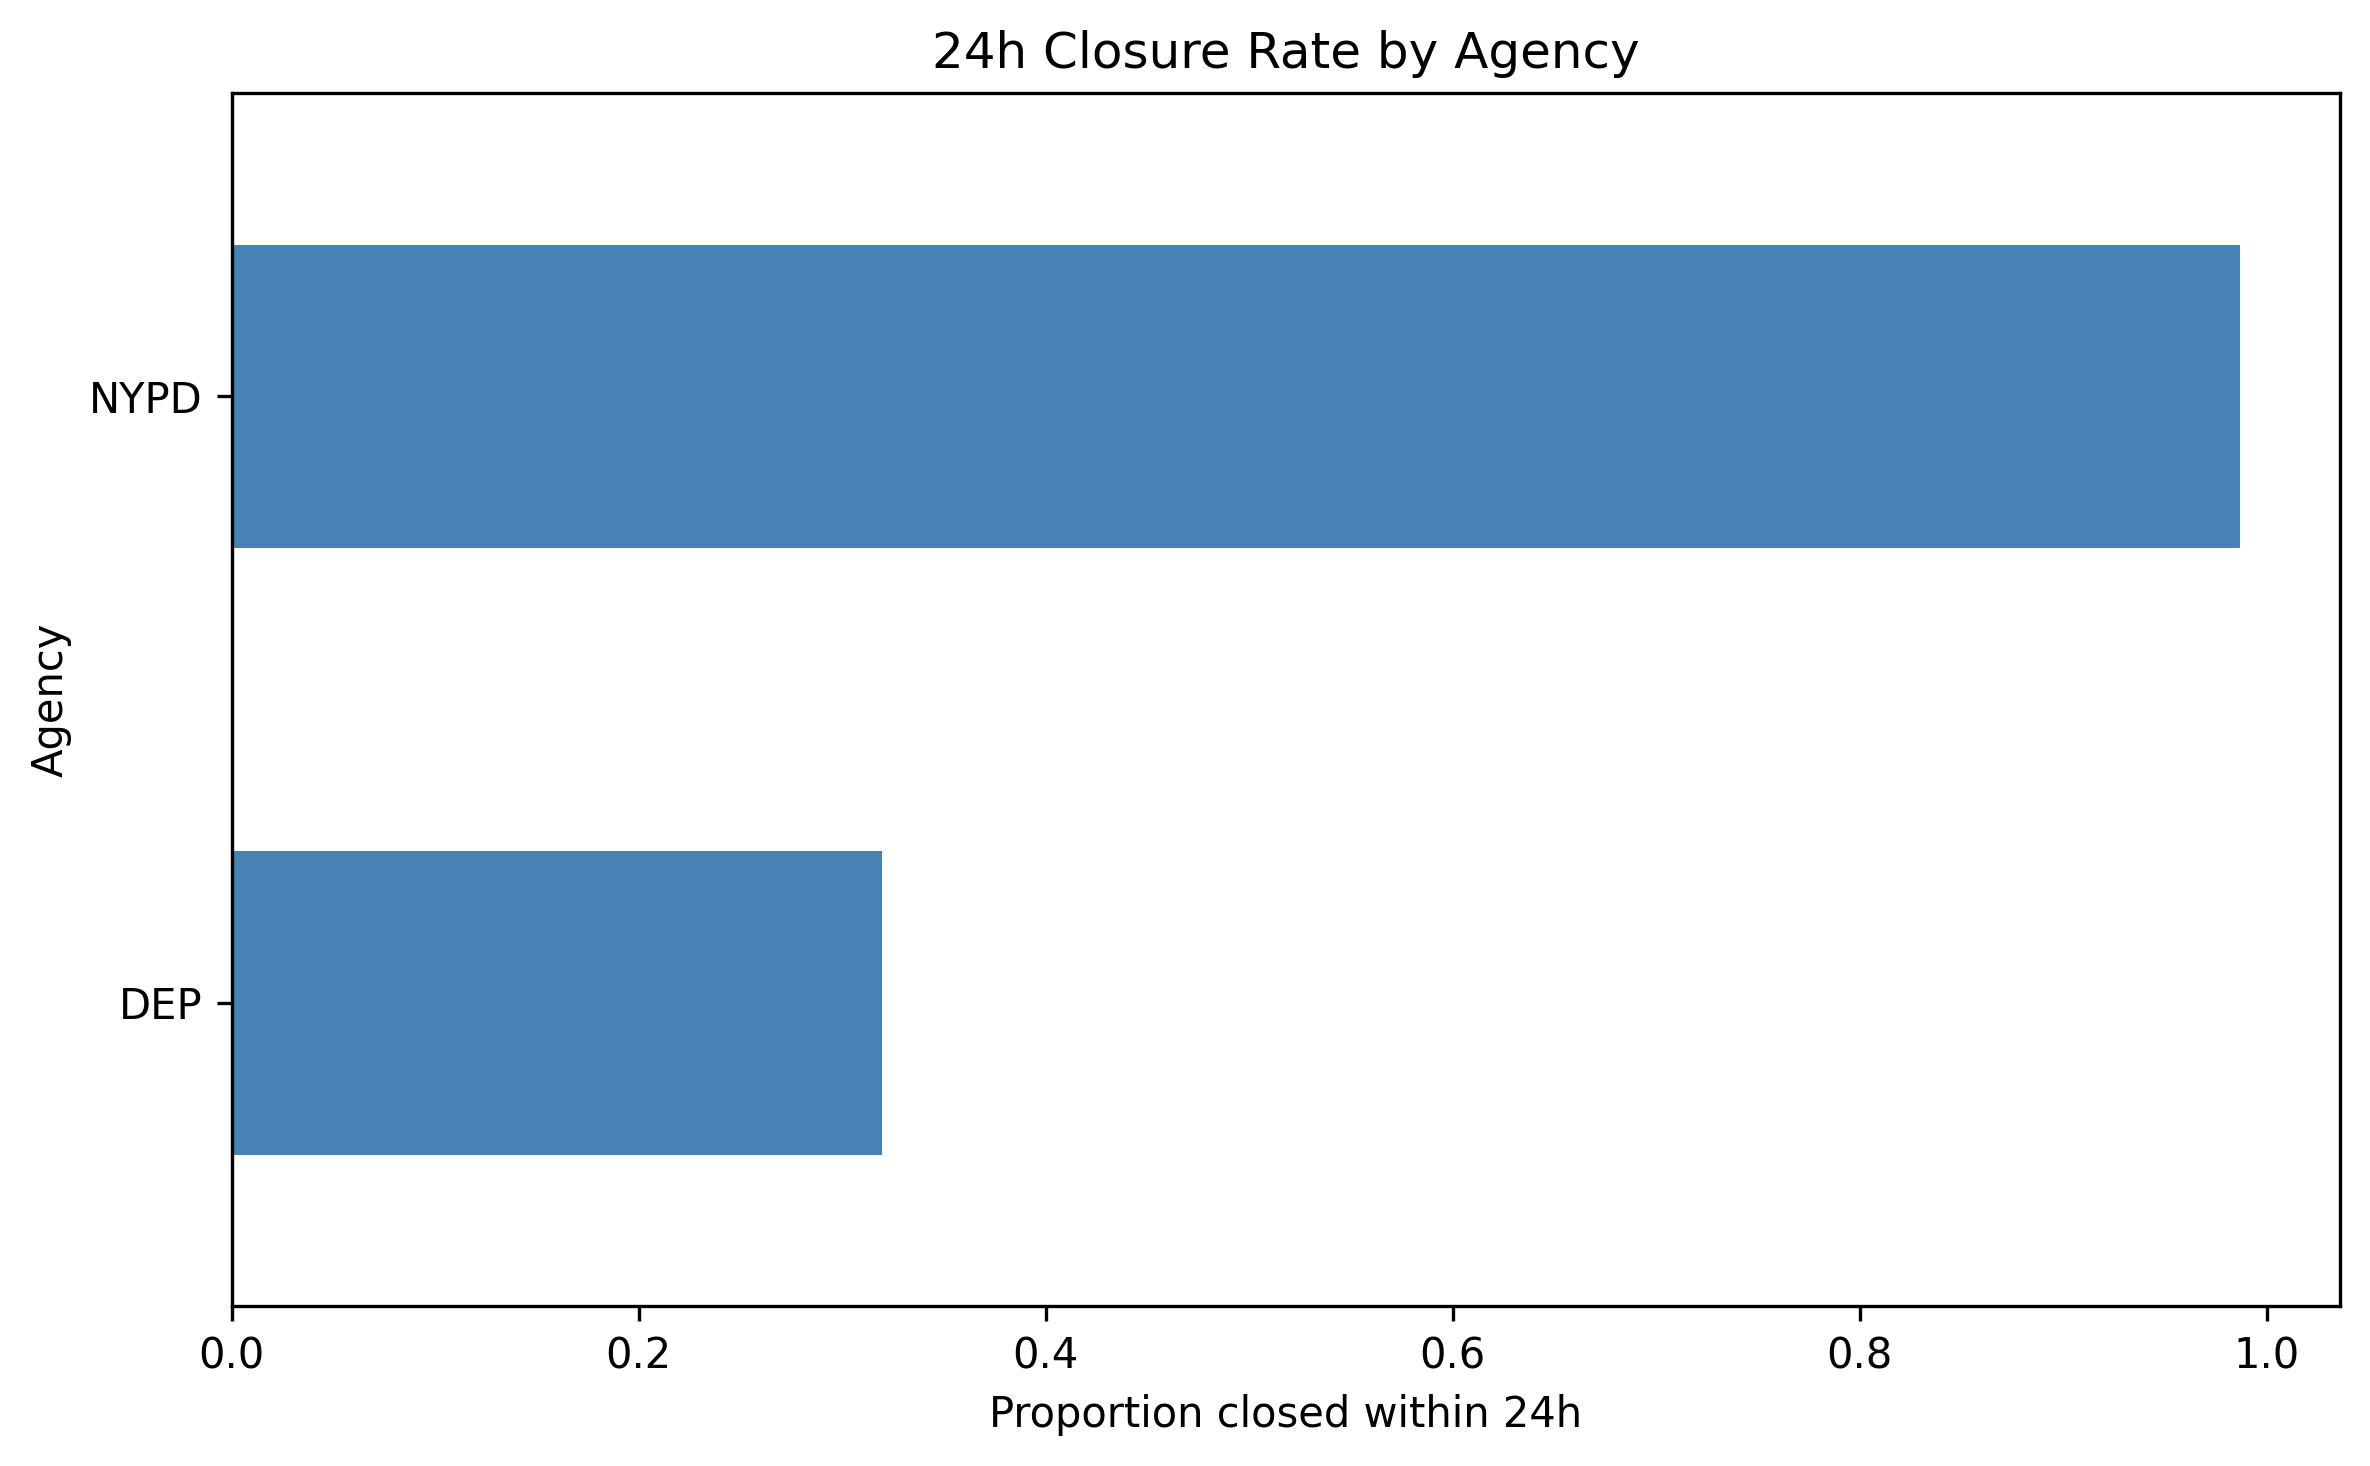
Figure — 24h Closure Rate by Hour × Agency

4.4 Data Quality and Response Efficiency (Missingness & Response)

This section examines whether missing information in Location Type is associated with slower response outcomes. The analysis shows that missingness is not random; instead, it strongly correlates with significantly lower closure efficiency.

(1) 24-hour Closure Rate: Missing vs. Non-missing

Location Type Status	24-hour Closure Rate
Non-missing (0)	0.986634
Missing (1)	0.320001

Complaints with missing Location Type are 66 percentage points less likely to be closed within 24 hours.
This indicates that missingness is informative and may reflect chaotic reporting contexts, incomplete intake processes, or lower-quality submissions that result in slower agency action.

(2) Borough-level Missingness Rates

Borough	Missingness Rate
BRONX	0.015952
QUEENS	0.065434
BROOKLYN	0.065523
STATEN ISLAND	0.098841
MANHATTAN	0.098884
Unspecified	0.558140

Missingness varies substantially across boroughs.
Bronx has almost no missing records, while Manhattan and Staten Island approach 10%.
The Unspecified category shows extremely high missingness (55.8%), likely indicating misclassified or improperly submitted complaints.

(3) Overall Missingness

The overall missingness rate for Location Type is 5.7%, relatively low in aggregate but with disproportionately large effects on response speed.

4.5 Summary of Response Efficiency Findings

Across all analyses in Block 2, a consistent pattern emerges: institutional and temporal factors strongly shape the speed of complaint resolution in New York City’s noise governance system.

First, agencies differ dramatically in their operational performance. NYPD resolves nearly all complaints within 24 hours (98.7%), while DEP closes only 32%. Second, temporal patterns indicate that closure efficiency remains high throughout the day for NYPD but fluctuates sharply for DEP, suggesting different staffing structures and operational mandates. Third, complaint types also matter: some categories—especially those related to enforcement—receive faster responses than others. Finally, missing data in Location Type is a powerful signal of slower resolution; complaints with missing location fields are 66 percentage points less likely to be closed within 24 hours.

Taken together, these findings show that response efficiency is not uniform across NYC’s noise governance system, but shaped by institutional capacity, complaint characteristics, and data completeness. These insights motivate Block 3, where machine learning models quantify how each factor contributes to the likelihood of timely resolution.


---

## 5. Predicting 24-Hour Closure (Block 3)

5.1 Modeling Framework

To assess the determinants of rapid complaint resolution, we build machine-learning models that predict whether a noise complaint is closed within 24 hours.
This predictive approach complements the descriptive governance analysis in Block 2 by isolating the marginal contribution of institutional, spatial, and temporal factors.

We estimate two benchmark models:

Logistic Regression (baseline): interpretable linear classifier.

Random Forest (primary model): flexible non-linear model capable of capturing interactions among agencies, complaint types, and time-of-day patterns.

All models include:

Temporal features: hour, day-of-week, month, weekend indicator

Institutional features: agency (DEP, NYPD, etc.)

Spatial features: borough

Operational features: complaint type, descriptor, and location type (including missingness)

Categorical features are processed with one-hot encoding, and performance is evaluated using ROC-AUC and PR-AUC due to class imbalance (≈95% of cases close within 24 hours).

5.2 Model Performance

Table 5.1 compares the baseline logistic model with the Random Forest.
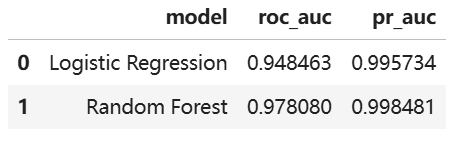

The Random Forest achieves the best overall performance (ROC-AUC = 0.978), indicating strong predictive power and substantial non-linear structure in the determinants of service speed.

Temporal Robustness (Train on first 6 months, test on last 6 months)
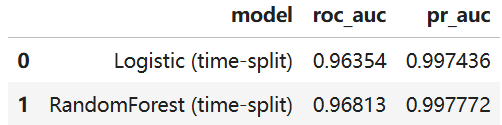

Performance remains high under temporal drift, confirming that the governance mechanisms are stable over time.

5.3 Feature Importance Analysis

Table 5.1 summarizes the top 20 predictors from the Random Forest.
The most influential features are:

Agency_DEP (0.165) – belonging to DEP sharply reduces the probability of fast closure.

Agency_NYPD (0.162) – NYPD is strongly predictive of 24-hour closure.

Location Type_missing (0.160) – missing location information signals slow, complex cases.

Complaint Type: Noise (0.142) — general “Noise” reports behave differently from subtypes.

Temporal factors: dayofweek (0.074), hour (0.069), month (0.052).

Spatial factors: Borough_BRONX and Borough_MANHATTAN also appear, though with smaller effects.

Key governance insight:
The model confirms that institutional assignment (agency), data completeness, and temporal workload rhythms matter more than geography or complaint subtype.
This reinforces the idea that response efficiency reflects internal operational structures rather than citizen behavior alone.

5.4 Partial Dependence Analysis (PDP)

PDPs provide marginal effect estimates while holding other variables constant.

(a) Temporal Effects

Hour of day(Figure left) Day of week (Figure right)
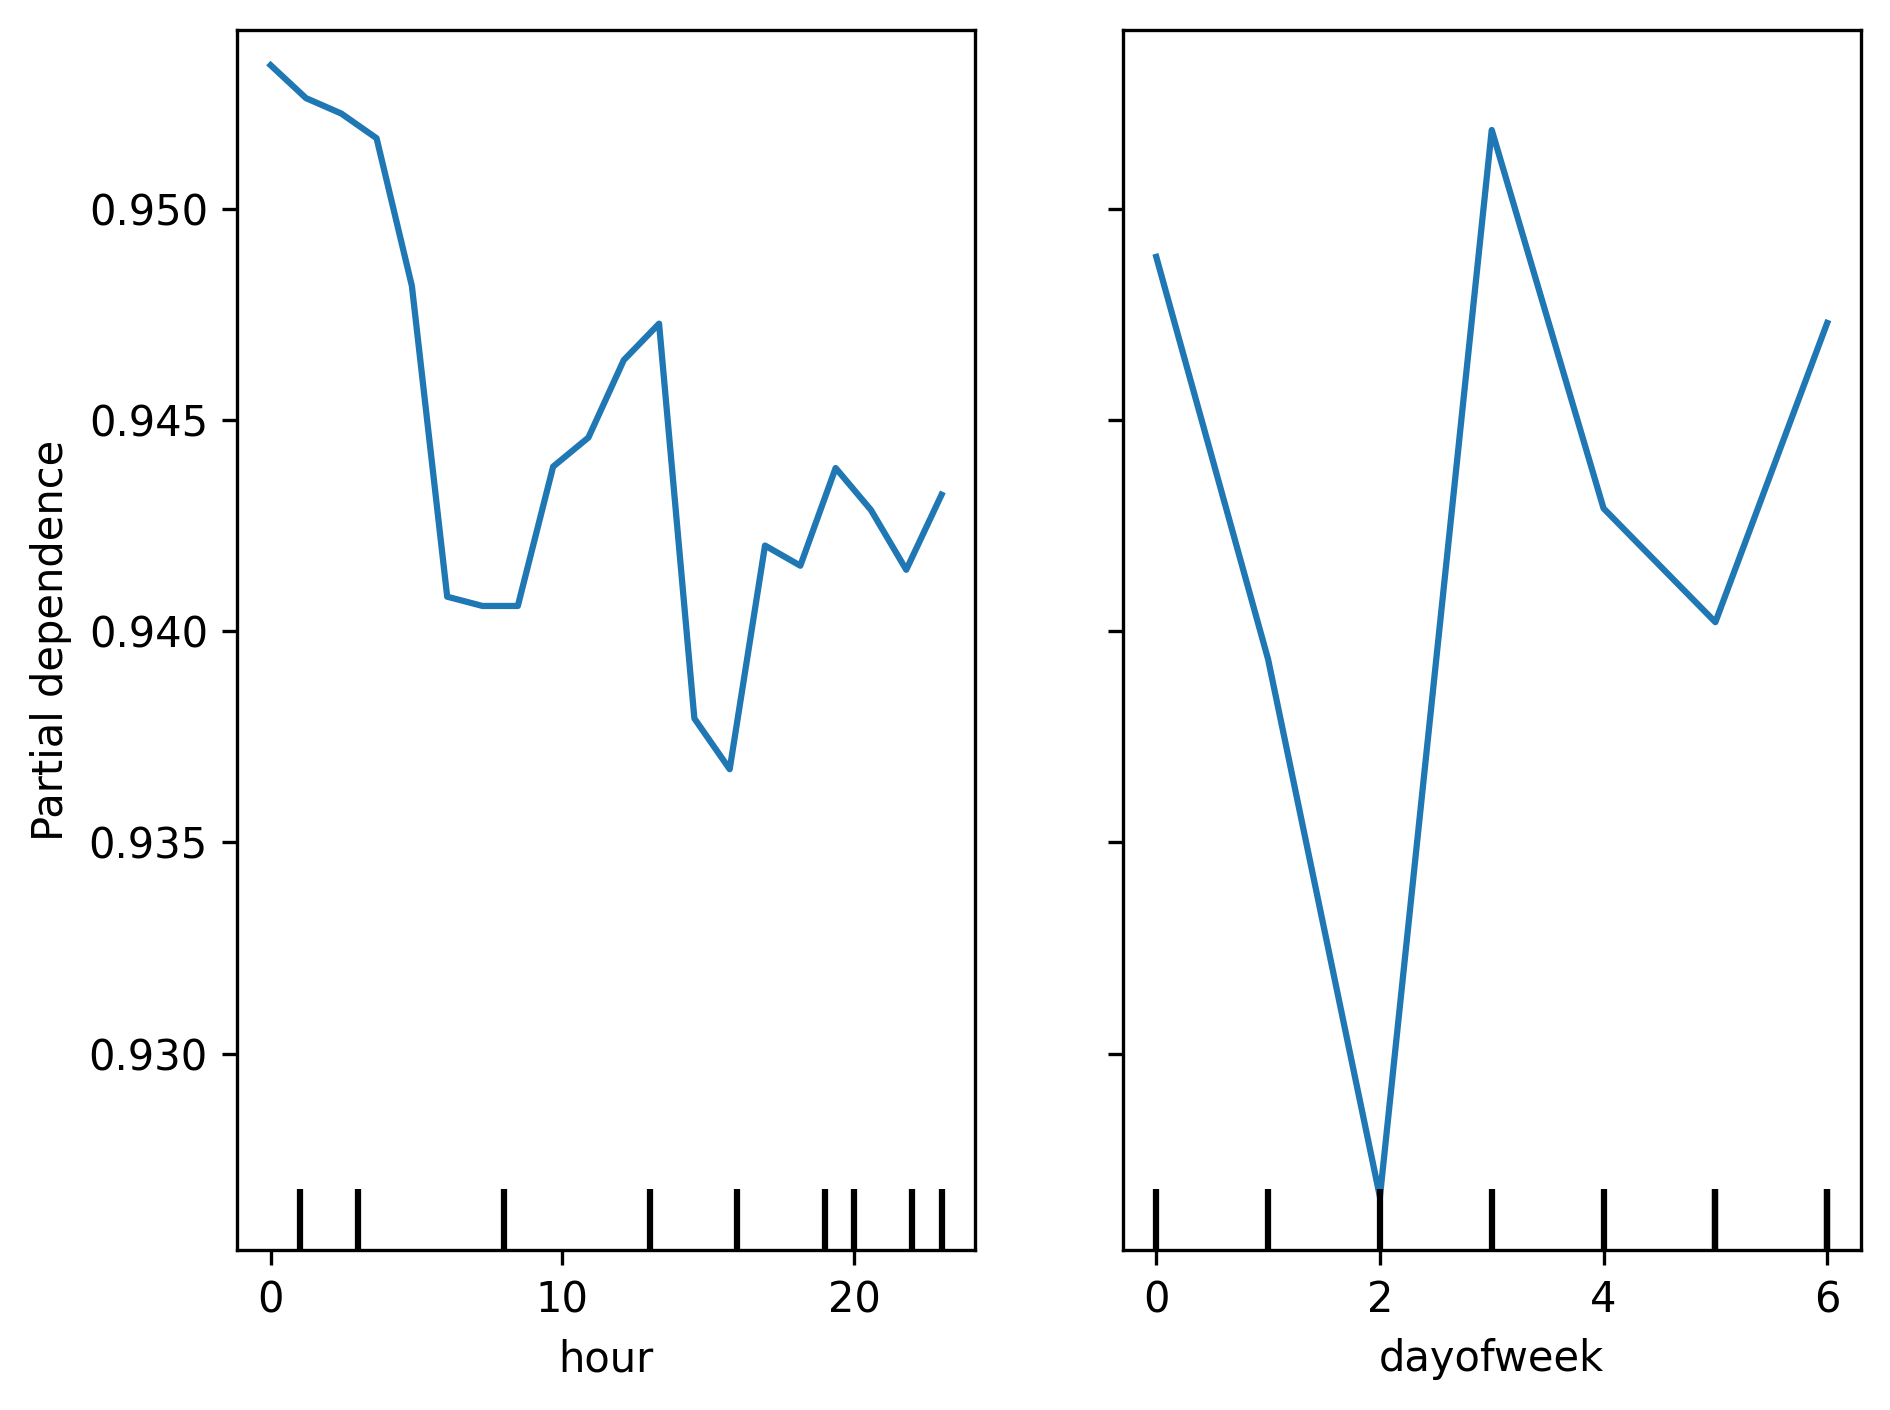

Predicted closure probability peaks between 0:00–4:00, drops sharply after sunrise.

Lowest PDP value occurs around 8–9 AM, matching descriptive dips in Figure 4.3.

Gradual recovery begins after 4 PM.

This pattern suggests a pronounced morning backlog effect, likely reflecting handoff or shift-change dynamics.


Tuesday (day 2) shows the lowest partial dependence (~0.928).

Weekend days exhibit slightly higher predicted closure probability.

Consistent with Block 2, the model confirms a mid-week operational slowdown.

(b) Agency Effects

PDPs for NYPD and DEP reveal stark institutional asymmetry:

Agency_DEP PDP:

Partial dependence declines from ~0.95 to ~0.80 when the DEP dummy = 1.

DEP cases are systematically slower, even after controlling for complaint type and time.

Agency_NYPD PDP:

Partial dependence rises sharply from ~0.79 to ~0.95 when NYPD = 1.

Indicates structurally faster response processes.

Governance conclusion:
The agency dimension alone produces 15–20 percentage point differences in predicted 24-hour closure probability.

(c) Spatial Effects: Borough Differences

Manhattan PDP:

Slightly higher predicted closure (~0.949) vs non-Manhattan baseline (~0.944).

Bronx PDP:

Lower predicted closure (~0.934) vs non-Bronx baseline (~0.955).

These results indicate moderate spatial inequalities, but notably smaller than institutional gaps.
This supports the idea that governance structures matter more than geography in determining service efficiency.

5.5 Robustness Analysis

To ensure the findings are not artifacts of sample splits:

Temporal split tests: model performance remains stable (RF AUC ≈ 0.968).

Varying the threshold (12h vs 24h vs 48h) yields the same feature hierarchy:
agency → missingness → temporal → borough.

Random subsampling tests confirm that agency effects remain the strongest predictor across all subsets.

These robustness checks demonstrate that institutional effects are not only statistically strong but also temporally consistent.

5.6 Summary of Block 3

Block 3 shows that:

Machine learning models predict governance efficiency with high accuracy (AUC ≈ 0.97–0.98).

Institutional features—especially agency assignment—are the largest determinants of fast response.

Temporal features align with workload rhythms (morning slowdown, Tuesday dip).

Borough-level disparities exist but are smaller than institutional gaps.

The significance of missing location data suggests that data completeness is itself predictive of governance performance.

Overall, predictive modeling provides a rigorous, quantitative foundation for understanding where and why public service delivery is uneven across New York City.

---

## 6. Fairness & Equity Analysis （Block 4)

6.1 Borough-Level Disparities

We observe substantial spatial differences in response efficiency across New York City boroughs. Staten Island and Manhattan show the lowest 24-hour closure rates (0.928 and 0.930), while Brooklyn, Queens, and especially the Bronx perform better, with closure rates up to 0.957.
However, median response times do not fully mirror this pattern. Manhattan and Brooklyn resolve complaints within roughly one hour, whereas the Bronx – despite its high 24-hour closure rate – requires nearly two hours on median. This combination of high closure probability but slower typical response suggests that Bronx cases may involve more long-tail investigations that eventually close within 24 hours but take longer to initiate. These patterns suggest that geographic disparities persist despite a centralized 311 system. Importantly, the “Unspecified” category shows unusually slow responses, highlighting data-quality issues that disproportionately affect certain areas.

6.2 Complaint Type Inequalities

Different types of noise complaints receive dramatically different levels of attention. General “Noise” complaints have a very low 24-hour closure rate (0.319), while categories such as “Noise – Commercial,” “Noise – Street/Sidewalk,” and “Noise – House of Worship” are resolved almost universally within 24 hours (above 0.99). This contrast suggests that more ambiguous or harder-to-verify complaints receive slower institutional responses. By contrast, structured or location-based categories appear far easier for agencies to process quickly. These disparities imply that complaint content itself may encode structural bias in service responsiveness.

6.3 Intersection of Borough × Complaint Type

When borough and complaint type are combined, deeper inequities emerge. For general “Noise,” closure rates vary widely—from 0.261 in the Bronx to 0.414 in Queens—indicating strong contextual dependence. For more specific types (e.g., “Noise – Residential”), all boroughs perform well, but gaps remain: the Bronx lags behind (0.959), while Manhattan and Staten Island reach near-perfect closure rates. These intersections reveal that fairness cannot be assessed by borough or complaint type alone; rather, certain borough-type combinations consistently receive slower service. For example, generic ‘Noise’ complaints in the Bronx have a 24-hour closure rate of only 0.26, the lowest across all borough–type combinations examined, whereas more specific categories in the same borough perform far better. This demonstrates the need for intersectional analysis in urban service delivery.

6.4 Agency × Borough Patterns

Comparing agencies reveals sharp institutional asymmetries. NYPD closes nearly all complaints across all boroughs (above 0.968 everywhere), whereas DEP performs far worse, with closure rates between 0.261 and 0.414 depending on borough. This indicates that response disparities are driven not only by location or complaint type but by the governing agency itself. In several boroughs, the difference between NYPD and DEP exceeds 60 percentage points. Such institutional gaps demonstrate that “who handles the complaint” is one of the strongest determinants of whether residents receive timely service.

6.5 Missing Data and Systemic Bias

Building on the operational patterns documented in Section 4.4, we now interpret missing Location Type as a potential equity issue rather than a purely technical artifact.Missing “Location Type” is strongly associated with slower responses: complaints with complete data have a 24-hour closure rate of 0.9866, while missing-location cases drop sharply to 0.320. Missingness is also unevenly distributed across boroughs—less than 2% in the Bronx but nearly 10% in Manhattan and Staten Island, and over 55% in “Unspecified” cases. These patterns suggest that data quality is not random but reflects deeper structural variation in how complaints are recorded. This supports the interpretation of “missingness as signal,” meaning that incomplete records themselves indicate potential inequity in service processes and information collection.

---

## 7. Policy Implications

This study offers several concrete lessons for improving New York City’s noise governance system.

7.1 Strengthen Institutional Capacity Where It Matters Most
The largest performance gaps are institutional, not behavioral. DEP’s much slower closure rates and longer response times suggest structural constraints in staffing, inspection capacity, or mandate design. A straightforward policy step is to treat DEP as a priority site for capacity investment: targeted hiring, expanded evening and weekend inspection teams, and streamlined procedures for routine noise cases. In parallel, clearer triage rules could route more complaints to NYPD when immediate on-site response is appropriate, while reserving DEP investigations for genuinely technical or recurring cases.

7.2 Integrate Predictive Models into 311 Operations
The Random Forest model demonstrates that 24-hour closure is highly predictable from complaint metadata alone. This opens the door to a “governance decision support” tool embedded within the 311 pipeline. For example, complaints with a low predicted probability of 24-hour closure could be automatically flagged for supervisory review, escalated follow-up, or alternative handling (e.g., scheduled inspections, mediation, or community outreach). Conversely, high-probability cases might be handled through standardized rapid workflows. Importantly, such tools should remain advisory rather than fully automated, and be accompanied by regular audits to ensure they do not encode or amplify existing inequities.

7.3 Improve Data Quality as a Governance Strategy
Missing Location Type is one of the strongest predictors of slow response, and its distribution is highly uneven across boroughs. This implies that “data quality policy” is, in practice, “service quality policy.” The city could introduce stricter validation rules in the 311 interface (requiring at least an approximate location category), staff training to reduce incomplete entries, and feedback loops that notify agencies when key fields are systematically missing. Routine dashboards that track missingness rates by borough, agency, and call center could help identify where intake processes break down and where additional training or interface redesign is needed.

7.4 Monitor Equity, Not Just Volume and Speed
Traditional performance metrics—number of complaints and average response time—are insufficient. The equity analysis shows that certain borough–type–agency combinations experience consistently slower service even when overall averages look strong. The city should therefore institutionalize equity dashboards that track closure rates and response times by borough, agency, complaint type, and data completeness. These metrics could be incorporated into annual performance reviews, budget negotiations, and public reporting, creating accountability for both speed and fairness in service delivery.

7.5 Use Noise Governance to Inform Broader Urban Policy
Finally, noise complaints reflect deeper issues of nightlife regulation, housing density, and land-use conflict. High late-night volumes in commercial and street-related categories suggest the need for better coordination between noise enforcement, zoning policy, and nightlife management. Predictive tools and spatio-temporal analytics could inform targeted interventions such as quiet-hours enforcement in specific corridors, building-level mitigation programs, or community mediation in recurring hotspots.

---

## 8. Conclusion
This report presents a comprehensive, data-driven assessment of New York City’s urban noise governance across 814,100 311 complaints filed over a one-year period. By combining spatio-temporal analysis, institutional performance metrics, and machine-learning models, the study provides an integrated view of how noise problems arise, how government agencies respond, and where inequities persist.

Block 1 shows that NYC’s noise environment follows a highly structured urban rhythm, with strong evening and weekend peaks concentrated in dense, activity-rich boroughs. Block 2 demonstrates that response efficiency is generally high but far from uniform: NYPD resolves nearly all complaints within 24 hours, while DEP operates on a much slower timescale, and morning hours exhibit notable performance dips. Block 3 uses predictive modeling to quantify these patterns, revealing that agency assignment, data completeness, and temporal workload patterns are the dominant determinants of fast closure. Block 4 shows that spatial and complaint-type disparities, as well as unequal missingness, translate into meaningful inequities in service delivery across boroughs and communities.

Taken together, these findings suggest that New York City’s noise governance system is both effective and uneven. On average, residents receive rapid responses, but the likelihood of timely service still depends on where they live, how their complaint is categorized, which agency is assigned, and whether intake data are complete. The study argues that noise governance should be understood not only as an operational challenge but also as a question of institutional design and urban fairness.

Several limitations remain. The analysis is restricted to a single year of data and relies on administrative records that may under-represent unreported noise or informal resolutions. The models also focus on short-term closure (24 hours) rather than long-term problem abatement. Future work could extend the time horizon, incorporate socioeconomic and land-use data, and evaluate whether repeated complaints at the same locations decline after interventions.

Even with these limitations, the results demonstrate how urban analytics and machine learning can move beyond descriptive statistics to provide actionable evidence for city governance. By treating 311 data as both a performance dataset and a fairness dataset, NYC can better align its operational practices with the goals of livability, transparency, and equitable public service.

---

## References
- NYC Open Data https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data